# Classification Model Project

Please fill out:
* Student name: Max Steele
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Table of Contents

<font size=3rem>
    
- **[Introduction](#Introduction)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[INTERPRET](#INTERPRET)**<br>
- **[Conclusions/Recommendations](#Conclusions/Recommendations)<br>**
</font>

# Introduction

Data files were obtained from <a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/"> DrivenData</a> (<a href="https://www.cdc.gov/nchs/nis/data_files_h1n1.htm">Source</a>: CDC, NCRID and NCHS (2012), National 2009 H1N1 Flu Survey).

# OBTAIN

In [1]:
from project_functions import check_null, check_unique, check_col_distr, plot_bar, plot_box, plot_bb, plot_reg

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## read in data, came in 2 separate files 
# one contains features and the other contains the corresponding labels
features = pd.read_csv('Data_files/training_set_features.csv')
labels = pd.read_csv('Data_files/training_set_labels.csv')

## display the first 5 rows of both DataFrames
display(features.head())
labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN
1,1,3.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe
2,2,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,nan,1.000,0.000,0.000,nan,3.000,1.000,1.000,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo
3,3,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,nan,3.000,3.000,5.000,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN
4,4,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,3.000,3.000,2.000,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
## concatenate the training features and labels into a single DataFrame for cleaning and exploration
df = pd.concat([features, labels.drop('respondent_id', axis=1)], axis=1)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN,0,0
1,1,3.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,0,1
2,2,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,nan,1.000,0.000,0.000,nan,3.000,1.000,1.000,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0,0
3,3,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,nan,3.000,3.000,5.000,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN,0,1
4,4,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,3.000,3.000,2.000,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0,0


In [5]:
## focus of problem is on seasonal flu vaccines, so information specific to h1n1 won't be needed
# create a list of col names specific to h1n1
h1n1_cols = [col for col in df.columns if 'h1n1' in col]
# drop h1n1 cols from df
df.drop(columns=h1n1_cols, axis=1, inplace=True)

## also, very little variation in behavioral_antiviral_meds and relatively unrelated to target,
## so drop that and also respondent_id
df.drop(columns=['behavioral_antiviral_meds', 'respondent_id'], axis=1, inplace=True)

# check new df
df.head()

,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN,0
1,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,1
2,1.000,0.000,0.000,0.000,0.000,0.000,nan,1.000,0.000,0.000,nan,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0
3,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,nan,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN,1
4,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,nan,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0


In [6]:
## check numbers of rows and columns
df.shape

(26707, 29)

In [7]:
## check info, num of rows and cols, dtypes, num nulls, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_avoidance         26499 non-null  float64
 1   behavioral_face_mask         26688 non-null  float64
 2   behavioral_wash_hands        26665 non-null  float64
 3   behavioral_large_gatherings  26620 non-null  float64
 4   behavioral_outside_home      26625 non-null  float64
 5   behavioral_touch_face        26579 non-null  float64
 6   doctor_recc_seasonal         24547 non-null  float64
 7   chronic_med_condition        25736 non-null  float64
 8   child_under_6_months         25887 non-null  float64
 9   health_worker                25903 non-null  float64
 10  health_insurance             14433 non-null  float64
 11  opinion_seas_vacc_effective  26245 non-null  float64
 12  opinion_seas_risk            26193 non-null  float64
 13  opinion_seas_sic

> - Note that `hhs_geo_region`, `employment_industry`, and `employment_occupation` are all encoded in random strings that do apply to specific categories. The meaning behind each string is unfortunately not provided by the CDC likely to protect anonymity of respondents. However, since these variables do respond to specific geographic regions, industries, and occupations specifically our model can at least use this information to make more accurate predictions. Additionally, by including these variables, we'll at least find out if they are important for predicting whether an individual obtains a vaccine or not even if this can't be related to specific regions or jobs.

# SCRUB

## Investigate Null/Missing Values

In [8]:
## display the number and percent of NaN's in each column
check_null(df)

,Number of Nulls,% Null
behavioral_avoidance,208,0.779
behavioral_face_mask,19,0.071
behavioral_wash_hands,42,0.157
behavioral_large_gatherings,87,0.326
behavioral_outside_home,82,0.307
behavioral_touch_face,128,0.479
doctor_recc_seasonal,2160,8.088
chronic_med_condition,971,3.636
child_under_6_months,820,3.070
health_worker,804,3.010


Because the full dataset is quite large (26,707 observations) and most columns have very few missing values, records will be dropped if they are missing information in any column comprised of less than 5% missing values. As seen above, this includes columns:
 - `behavioral_avoidance`
 - `behavioral_face_mask` 
 - `behavioral_wash_hands`
 - `behavioral_large_gatherings` 
 - `behavioral_outside_home`
 - `behavioral_touch_face` 
 - `chronic_med_condition`
 - `child_under_6_months` 
 - `health_worker` 
 - `opinion_seas_vacc_effective`
 - `opinion_seas_risk` 
 - `opinion_seas_sick_from_vacc` 
 - `household_adults`
 - `household_children`

<AxesSubplot:>

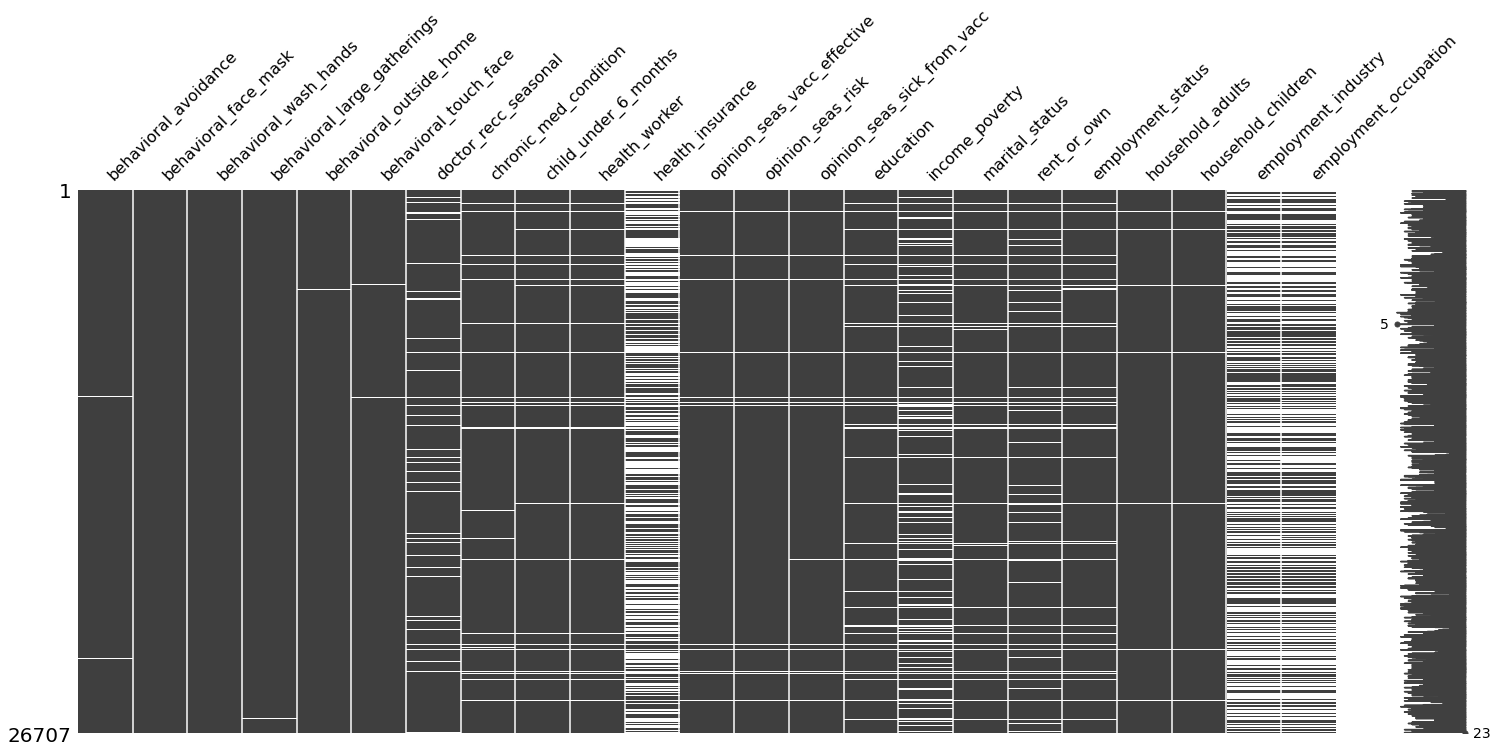

In [9]:
import missingno

## create a list of cols without any null values to be dropped from missingno.matrix
no_null_cols = [col for col in df.columns if df[col].isna().sum()==0]

## drop columns without missing info to get a clearer view of patterns
missingno.matrix(df.drop(columns=no_null_cols, axis=1))

> - The `employment_occupation`, `employment_industry`, and `health_insurance` columns contain the most missing values, with null values making up 50.4%, 49.9%, and 46.0% of the column, respectively.
 - However, 10,231 of the null values for `employment_occupation` and `employment_industry` are basically 'not applicable' rather than someone declining to answer because those are the respondents who answered 'Not in Labor Force' for `employment_status` (see below).
 - See the same for an additional 1,453 observations representing all unemployed individuals. Again `employment_occupation` and `employment_industry` are better thought of as 'not applicable' rather than someone declining to answer.
- There are some clear patterns in missing values:
  - If respondent declined to answer whether their doctor recommended one type of vaccine, they usually declined to answer about whether their doctor recommended the other.
  - Individuals also seemed to decline to answer whether they had a chronic medical condition, a child under 6 months, whether they were a health worker, all opinion questions, income, education, personal and home life questions in association.
- These trends suggest that missing information for certain variables may be usefully treated as its own category rather than being dropped altogether, since this appears to represent a specific type of respondent that makes up a not insignificant portion of the sample population.

In [10]:
## slice out DataFrame for individuals Not in Labor Force
# not_in_labor_force = df[df['employment_status']=='Not in Labor Force']

## display the number and percent of NaN's in each column
# display(check_null(not_in_labor_force))

## slice out DataFrame for 'Unemployed' individuals
# unemployed = df[df['employment_status']=='Unemployed']

## display the number and percent of NaN's in each column
# check_null(unemployed)

# not_lab_for_ids = list(not_in_labor_force['respondent_id'].index)
# unempl_ids = list(unemployed['respondent_id'].index)
# all_not_employed_ids = not_lab_for_ids + unempl_ids
# len(all_not_employed_ids)

In [11]:
## if a person is unemployed, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_industry'] = 'not employed'

## if a person is not in the labor force, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_industry'] = 'not employed'

# check_unique(df, 'employment_industry')

In [12]:
## if a person is unemployed, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_occupation'] = 'not employed'

## if a person is not in the labor force, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_occupation'] = 'not employed'

# check_unique(df, 'employment_occupation')

In [13]:
# create a DataFrame to show columns with % Null between 0 and 5%
null_df = check_null(df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
behavioral_avoidance,208,0.779
behavioral_face_mask,19,0.071
behavioral_wash_hands,42,0.157
behavioral_large_gatherings,87,0.326
behavioral_outside_home,82,0.307
behavioral_touch_face,128,0.479
chronic_med_condition,971,3.636
child_under_6_months,820,3.070
health_worker,804,3.010
opinion_seas_vacc_effective,462,1.730


In [14]:
## drop records with null values for the above columns, composed of less than 5% null values
under_5_null_cols = list(under_5_null.index)
df.dropna(subset=under_5_null_cols, inplace=True)

## check out the resulting df
display(check_null(df))
df.shape

,Number of Nulls,% Null
behavioral_avoidance,0,0.000
behavioral_face_mask,0,0.000
behavioral_wash_hands,0,0.000
behavioral_large_gatherings,0,0.000
behavioral_outside_home,0,0.000
behavioral_touch_face,0,0.000
doctor_recc_seasonal,1867,7.444
chronic_med_condition,0,0.000
child_under_6_months,0,0.000
health_worker,0,0.000


(25079, 29)

<AxesSubplot:>

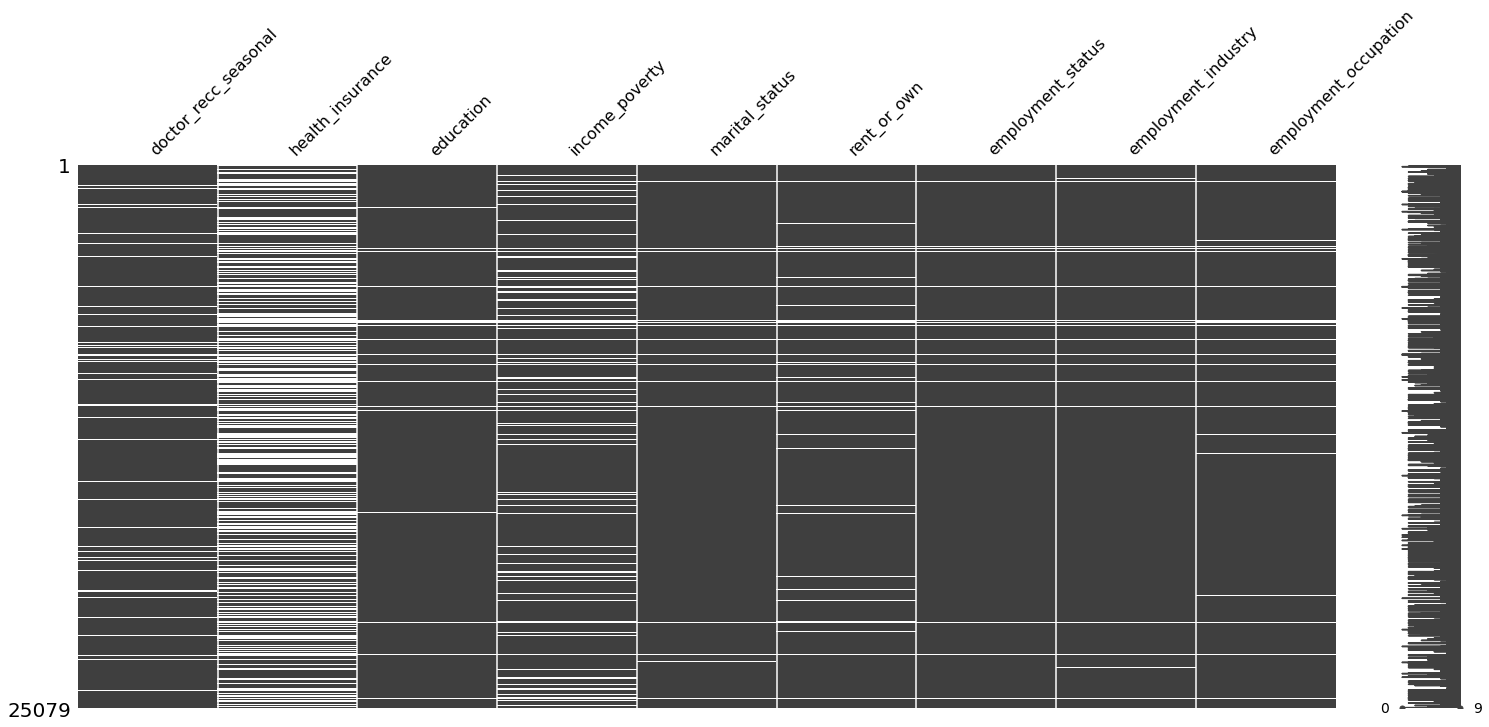

In [15]:
## create a list of cols without any null values to be dropped from missingno.matrix
no_null_cols = [col for col in df.columns if df[col].isna().sum()==0]

## drop columns without missing info to get a clearer view of patterns
missingno.matrix(df.drop(columns=no_null_cols, axis=1))

> - Because nearly half (44.2%) of respondents declined to disclose whether they have `health_insurance`, this 'missing' information will become its own category for this variable.
- The same will be done for the `income_poverty` variable, which is missing 13.4% of its values.
- The pattern of null values is so similar across the variables `education`, `marital_status`, `rent_to_own`, `employment_status`, `employment_industry`, and `employment_occupation` that choosing to drop records containing null values for any of these columns will drop most of the records containing null values for the other columns. Rather than dropping these records, null values for these categorical variables will be filled with 'missing' as its own category since this missing information appears to represent a specific type of survey respondent.
- The `doctor_recc_seasonal` column contains slightly more missing values, and the pattern for this missing information is different compared to the variables mentioned above. Thus null values in this column will be replaced with 'missing' as well.

In [16]:
## print out the counts of unique values appearing in each column, including counts of NaN
for col in df.drop(columns=no_null_cols, axis=1).columns:
    display(check_unique(df, col))

,doctor_recc_seasonal
0.000,15514
1.000,7698
nan,1867


,health_insurance
1.000,12300
nan,11089
0.000,1690


,education
College Graduate,9825
Some College,6854
12 Years,5596
< 12 Years,2266
NaN,538


,income_poverty
"<= $75,000, Above Poverty",12428
"> $75,000",6688
NaN,3368
Below Poverty,2595


,marital_status
Married,13204
Not Married,11339
NaN,536


,rent_or_own
Own,18215
Rent,5732
NaN,1132


,employment_status
Employed,13236
Not in Labor Force,9841
Unemployed,1418
NaN,584


,employment_industry
not employed,11259
fcxhlnwr,2410
wxleyezf,1762
ldnlellj,1198
pxcmvdjn,1012
atmlpfrs,906
arjwrbjb,852
xicduogh,827
NaN,759
mfikgejo,604


,employment_occupation
not employed,11259
xtkaffoo,1739
mxkfnird,1477
emcorrxb,1248
cmhcxjea,1230
xgwztkwe,1055
NaN,886
hfxkjkmi,746
qxajmpny,530
xqwwgdyp,479


## Feature Engineering

In [17]:
## check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25079 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_avoidance         25079 non-null  float64
 1   behavioral_face_mask         25079 non-null  float64
 2   behavioral_wash_hands        25079 non-null  float64
 3   behavioral_large_gatherings  25079 non-null  float64
 4   behavioral_outside_home      25079 non-null  float64
 5   behavioral_touch_face        25079 non-null  float64
 6   doctor_recc_seasonal         23212 non-null  float64
 7   chronic_med_condition        25079 non-null  float64
 8   child_under_6_months         25079 non-null  float64
 9   health_worker                25079 non-null  float64
 10  health_insurance             13990 non-null  float64
 11  opinion_seas_vacc_effective  25079 non-null  float64
 12  opinion_seas_risk            25079 non-null  float64
 13  opinion_seas_sic

>- Create a variable that represents how much an individual has done behaviorally to avoid the flu (aside from getting vaccinated) by summing up all behavioral variables. These are all binary columns with 1 representing behavior that reduces the risk of contracting the flu. By taking the sum across these columns, a higher score represents a more careful, flu-conscious/avoidant individual.

,behav_score
3.000,6972
5.000,4459
2.000,4373
4.000,4075
1.000,2488
0.000,1961
6.000,751


<AxesSubplot:xlabel='behav_score'>

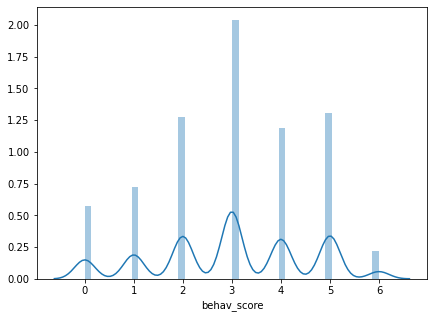

In [18]:
df['behav_score'] = df.iloc[:, :6].sum(axis=1)

## ## check counts of unique values in new col and plot distribution
check_col_distr(df, 'behav_score')

>- Create a variable that represents the ratio of how much an individual has done behaviorally to avoid the flu (aside from getting vaccinated) to their perception of the risk of getting the flu without the vaccine. The numerator is `behav_score` + 1 (min = 1, max = 7) to differentiate among individuals who are not taking any action to avoid the flu, but differ in the degree to which they are concerned about getting sick without the vaccine. The denominator is the rating of risk perception, `opinion_seas_risk` (min = 1, max = 5). An individual with a very low score is someone who has done little to avoid the flu but is very concerned about getting sick without the vaccine. An individual with a score on the upper end has done a lot to behaviorally minimize their risk of exposure and is not very concerned about getting sick without the vaccine. This type of individual may be less likely to get the vaccine, even if they think it's effective, simply because they feel they're doing enough to avoid exposure on their own.

,behav_to_risk
1.000,4745
2.000,3363
1.500,3232
3.000,2299
4.000,1351
1.250,1331
2.500,1297
0.500,1225
0.750,1183
6.000,831


<AxesSubplot:xlabel='behav_to_risk'>

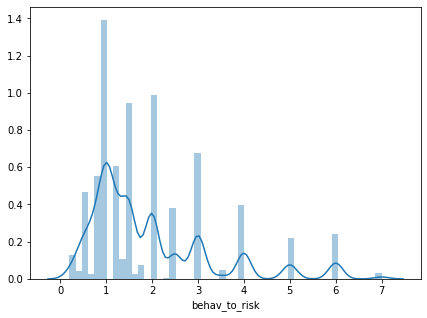

In [19]:
df['behav_to_risk'] = (df['behav_score'] + 1) / df['opinion_seas_risk']

## ## check counts of unique values in new col and plot distribution
check_col_distr(df, 'behav_to_risk')

> - Create a variable for whether or not an individual is 65 years or older as this represents a group at higher risk for serious complications from the flu.

,older_65
0,18744
1,6335


<AxesSubplot:xlabel='older_65'>

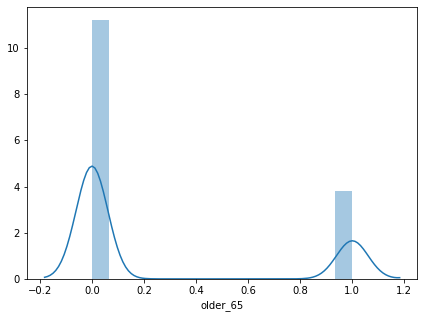

In [20]:
## define a function to return turn 65+ Years or not into a binary variable based on age group
def is_older_65(row):
    if row['age_group'] == '65+ Years':
        return 1
    else:
        return 0

## apply the function to create new column
df['older_65'] = df.apply(lambda x: is_older_65(x), axis=1)

## check counts of unique values in new col and plot distribution
check_col_distr(df, 'older_65')

> - Create a variable that represents an individual's overall risk for developing flu-related complications. Some individuals are naturally at higher risk of developing complications (<a href="https://www.cdc.gov/flu/highrisk/index.htm"> CDC - "People at High Risk for Flu Complications"</a>). This includes people **65 years and older**, **children 6 months or younger** (so people that have regular close contact with a child under 6 months will also be considered higher risk), and people with **chronic medical conditions** (such as asthma or other lung conditions, diabetes, heart conditions, kidney conditions, sickle cell anemia or other anemia, neurological or neuromuscular conditions, liver conditions, or weakened immune systems).

,high_risk_compl
0,12937
1,8918
2,3081
3,143


<AxesSubplot:xlabel='high_risk_compl'>

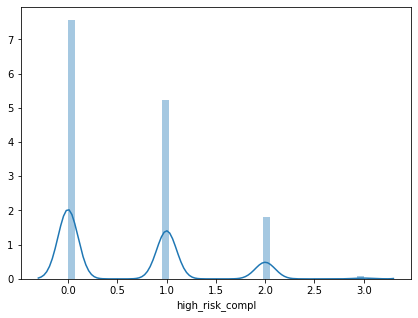

In [21]:
## define a function to calculate score for high risk of complications
def calc_high_risk(row):
    risk = 0
    if row['older_65'] == 1:
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

## apply the function to create new column
df['high_risk_compl'] = df.apply(lambda x: calc_high_risk(x), axis=1)

## check counts of unique values in new col and plot distribution
check_col_distr(df, 'high_risk_compl')

## Train Test Split and Preprocessing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25079 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_avoidance         25079 non-null  float64
 1   behavioral_face_mask         25079 non-null  float64
 2   behavioral_wash_hands        25079 non-null  float64
 3   behavioral_large_gatherings  25079 non-null  float64
 4   behavioral_outside_home      25079 non-null  float64
 5   behavioral_touch_face        25079 non-null  float64
 6   doctor_recc_seasonal         23212 non-null  float64
 7   chronic_med_condition        25079 non-null  float64
 8   child_under_6_months         25079 non-null  float64
 9   health_worker                25079 non-null  float64
 10  health_insurance             13990 non-null  float64
 11  opinion_seas_vacc_effective  25079 non-null  float64
 12  opinion_seas_risk            25079 non-null  float64
 13  opinion_seas_sic

In [23]:
## import function needed for split
from sklearn.model_selection import train_test_split

## define target variable
target = 'seasonal_vaccine'

## separate of features (X) and target (y) for train-test-split
X = df.drop(columns=target, axis=1).copy()
y = df[target].copy()

## split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=319)

In [24]:
## check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 0   0.531
1   0.469
Name: seasonal_vaccine, dtype: float64 
------

**y_train**
 0   0.532
1   0.468
Name: seasonal_vaccine, dtype: float64 
------

**y_test**
 0   0.529
1   0.471
Name: seasonal_vaccine, dtype: float64 
------



In [25]:
## import classes necessary for building preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
## need to process numerical and categorical variables differently, 
 # but right now some categorical variables are still showing up as numeric because NaNs 
 # haven't been filled in with 'missing' (this will be done as part of pipeline)
null_df = check_null(df)
miss_val_cols = list(null_df.loc[null_df['% Null']>0].index)
miss_val_cols 
# these all need to have null values filled with 'missing'
# so they will all be categorical if they aren't already

['doctor_recc_seasonal',
 'health_insurance',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'employment_industry',
 'employment_occupation']

In [31]:
## make a list of all columns that are currently object dtype
obj_cols = list(X_train.select_dtypes('O').columns)
## add to that list the columns with missing values that will become categorical when 'missing' imputed
 # use set() so no column appears twice in the list since there's some overlap
cat_cols = list(set(obj_cols + miss_val_cols))
cat_cols

['hhs_geo_region',
 'census_msa',
 'employment_occupation',
 'education',
 'doctor_recc_seasonal',
 'health_insurance',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'race',
 'age_group',
 'employment_industry',
 'sex',
 'employment_status']

In [32]:
## columns to be treated as numeric in pipeline are all the remaining cols in X 
 # that are not in cat_cols
num_cols = [col for col in X_train.columns if col not in cat_cols]
num_cols

['behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behav_score',
 'behav_to_risk',
 'older_65',
 'high_risk_compl']

In [33]:
## create a pipeline for transforming numerical columns
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
num_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [34]:
## create a pipeline for transforming categorical columns
cat_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])
cat_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [35]:
## combine num and cat transformer pipelines into a single preprocessing pipeline
preprocessing = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                                ('cat', cat_transformer, cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face',
                                  'chronic_med_condition',
                                  'child_under_6_months', 'health_worker',
                                  'opinion_seas_vacc_effective',
                                  'opinion_seas_risk',
                                  '...
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('en

In [36]:
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
X_train_tf

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

# EXPLORE

In [25]:
## print summary statistics for columns
df.describe()

,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine,behav_score,behav_to_risk,older_65,high_risk_compl
count,25079.000,25079.000,25079.000,25079.000,25079.000,25079.000,23212.000,25079.000,25079.000,25079.000,13990.000,25079.000,25079.000,25079.000,25079.000,25079.000,25079.000,25079.000,25079.000,25079.000,25079.000
mean,0.730,0.068,0.827,0.358,0.337,0.681,0.332,0.283,0.083,0.113,0.879,4.034,2.729,2.116,0.894,0.540,0.469,3.001,1.917,0.253,0.618
std,0.444,0.252,0.378,0.480,0.473,0.466,0.471,0.450,0.276,0.316,0.326,1.081,1.387,1.332,0.752,0.931,0.499,1.555,1.353,0.435,0.718
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.200,0.000,0.000
25%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000,2.000,1.000,0.000,0.000,0.000,2.000,1.000,0.000,0.000
50%,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,4.000,2.000,2.000,1.000,0.000,0.000,3.000,1.500,0.000,0.000
75%,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,5.000,4.000,4.000,1.000,1.000,1.000,4.000,2.500,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,5.000,5.000,3.000,3.000,1.000,6.000,7.000,1.000,3.000


## Investigate Variable Distributions and Relationship with Target

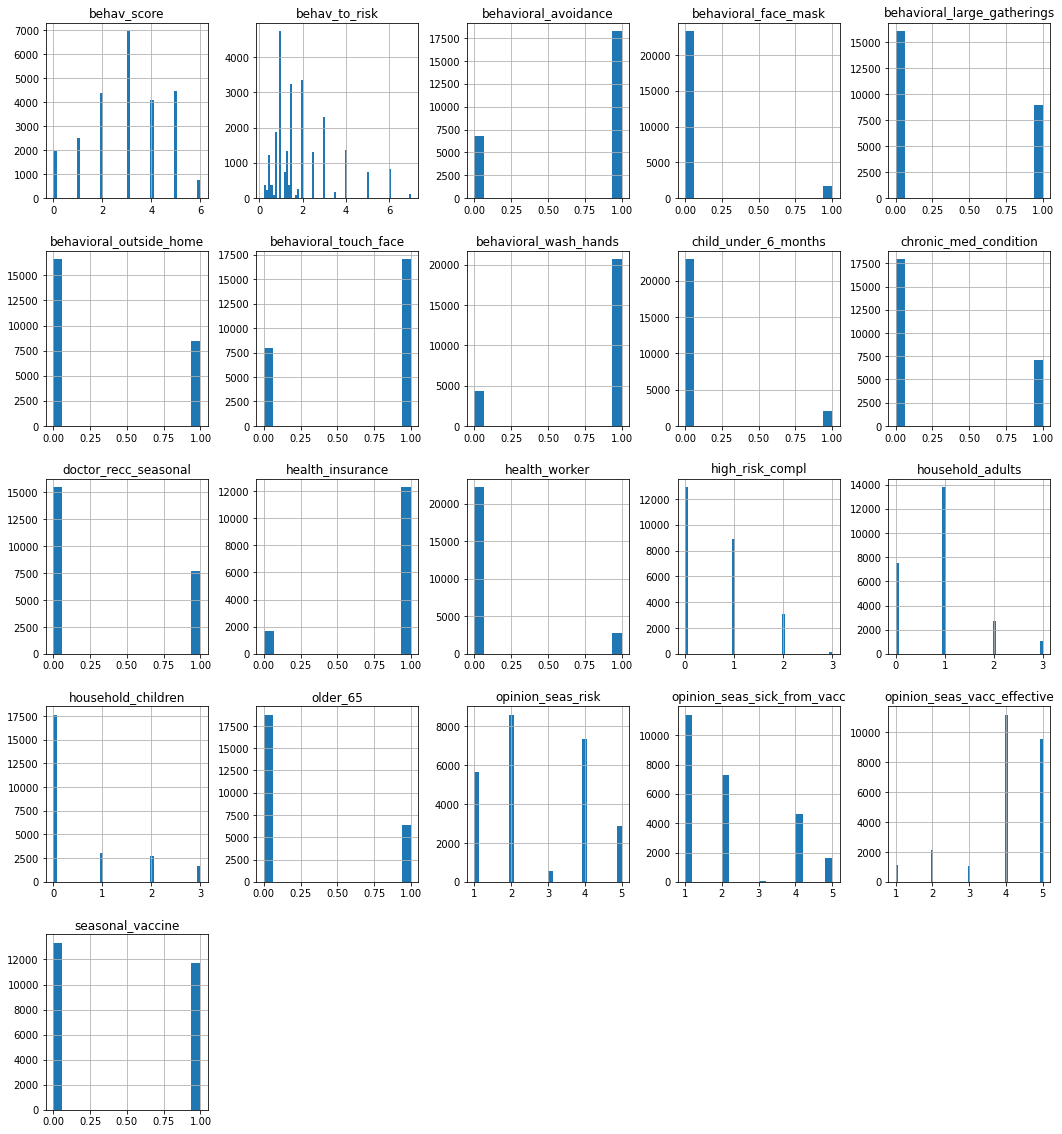

In [26]:
## display histograms for all variables and target
df.hist(figsize=(18, 20), bins='auto');

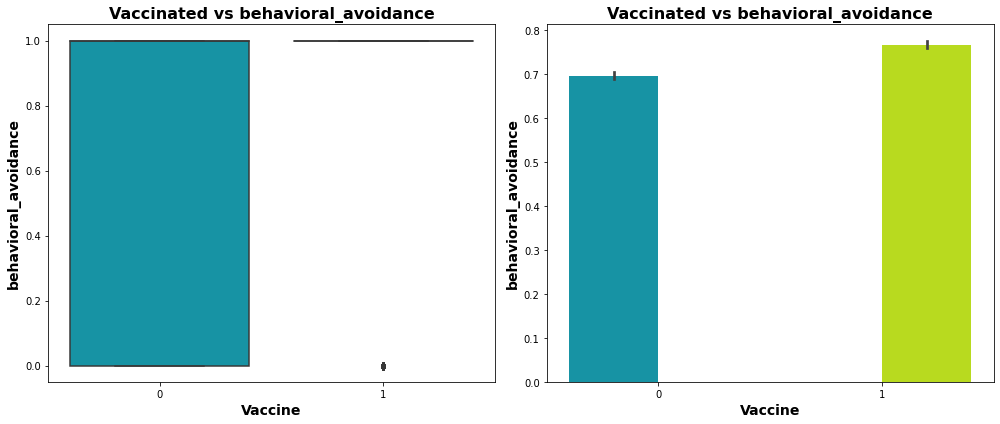

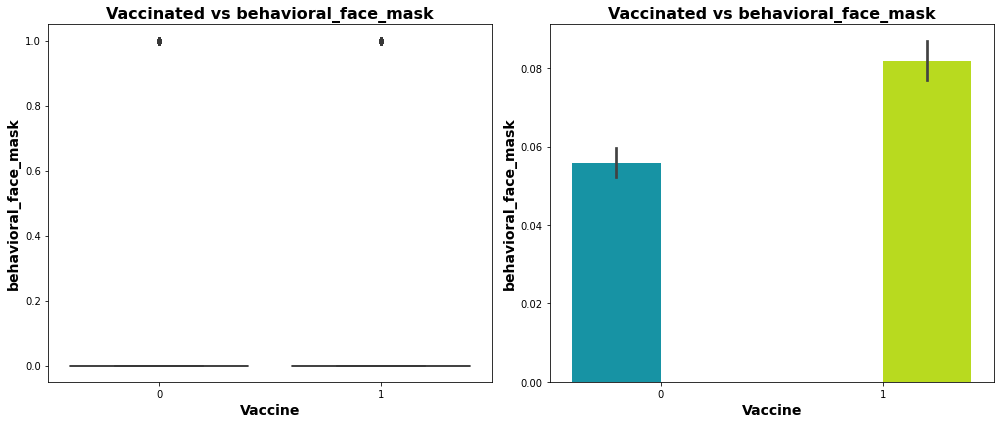

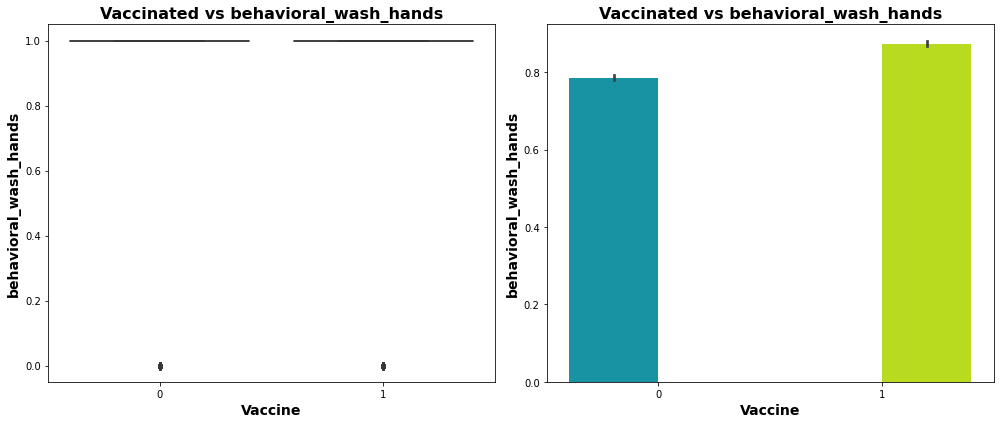

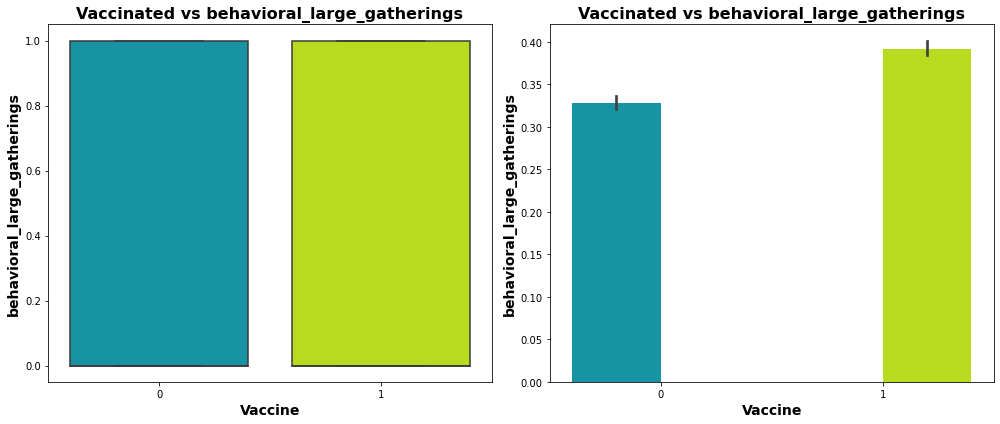

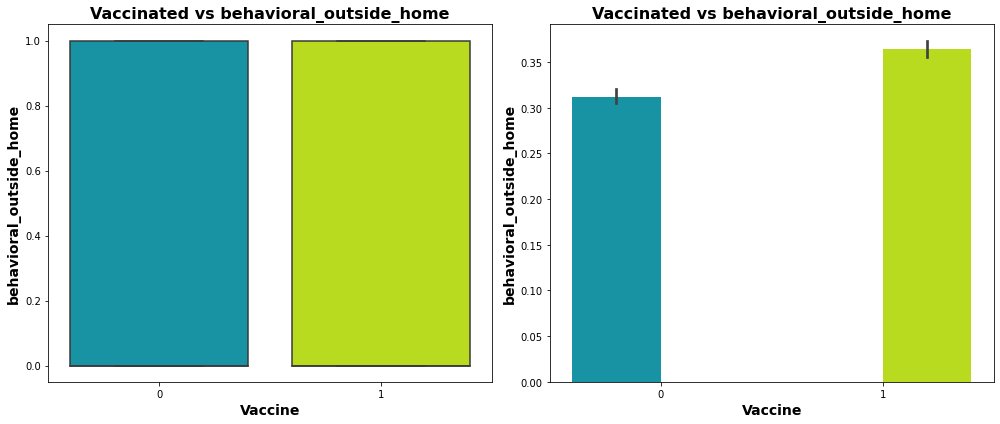

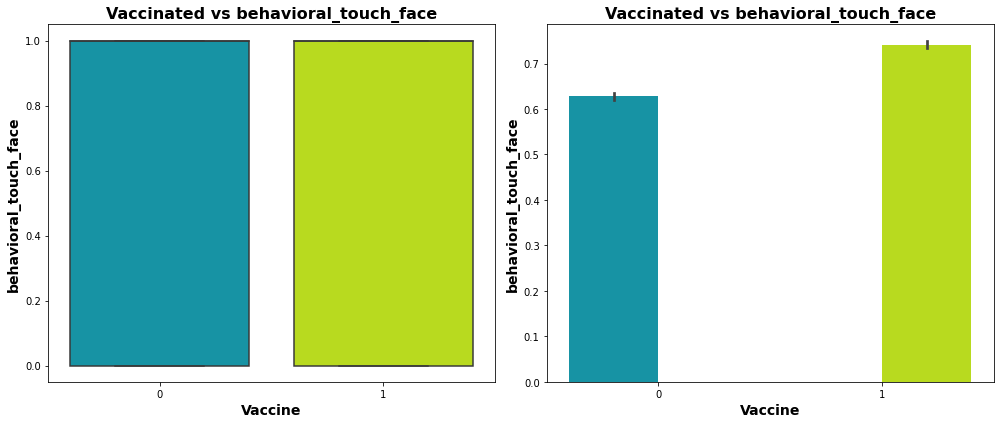

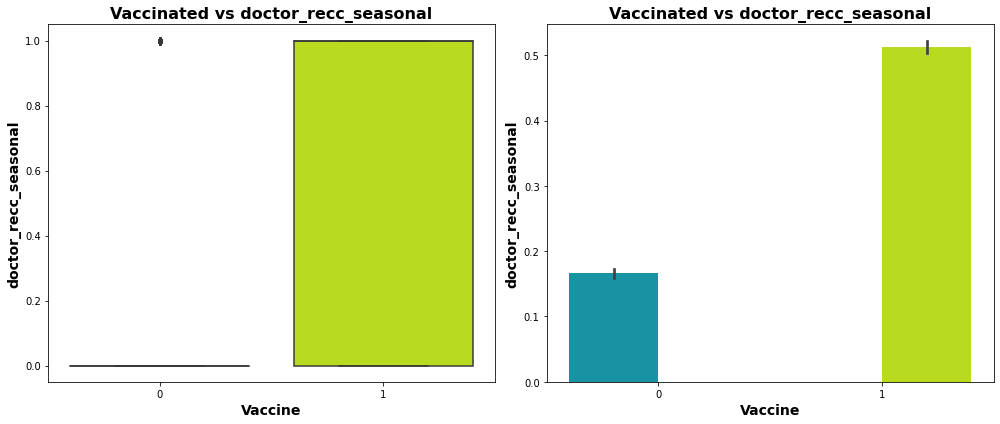

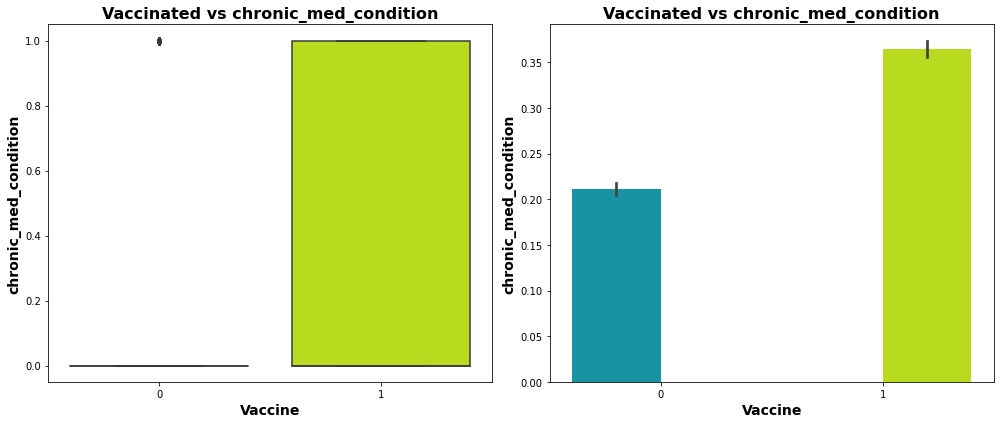

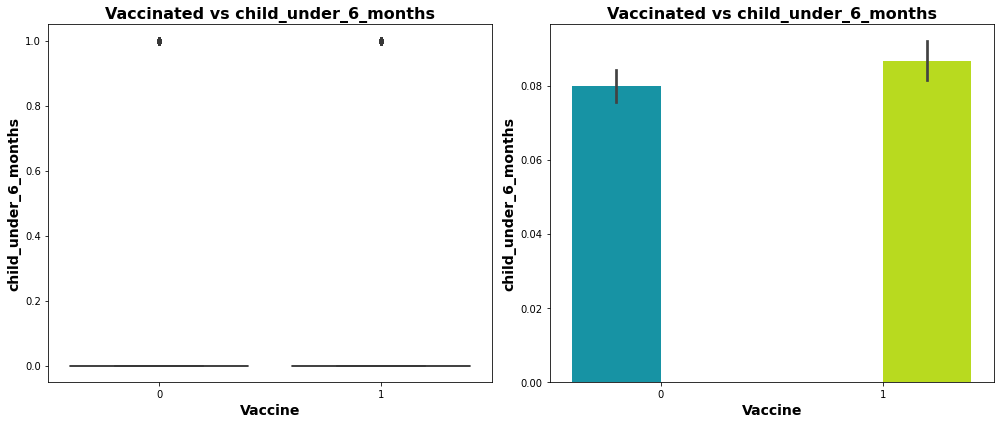

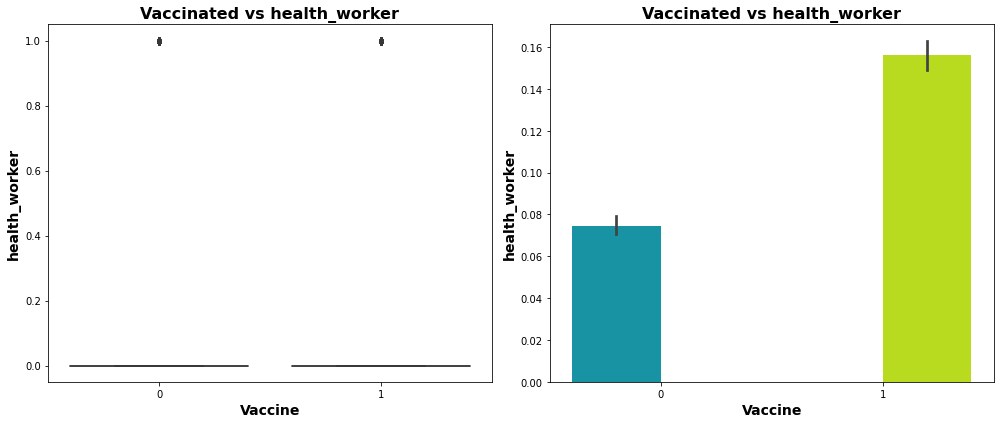

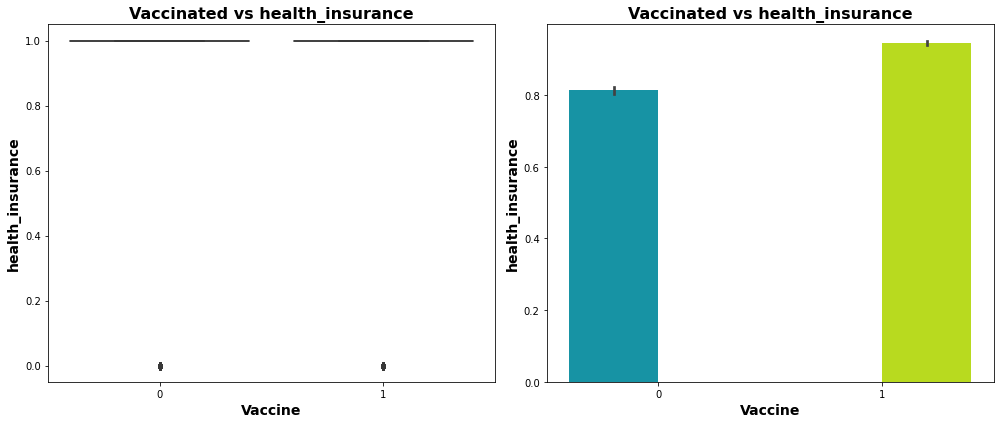

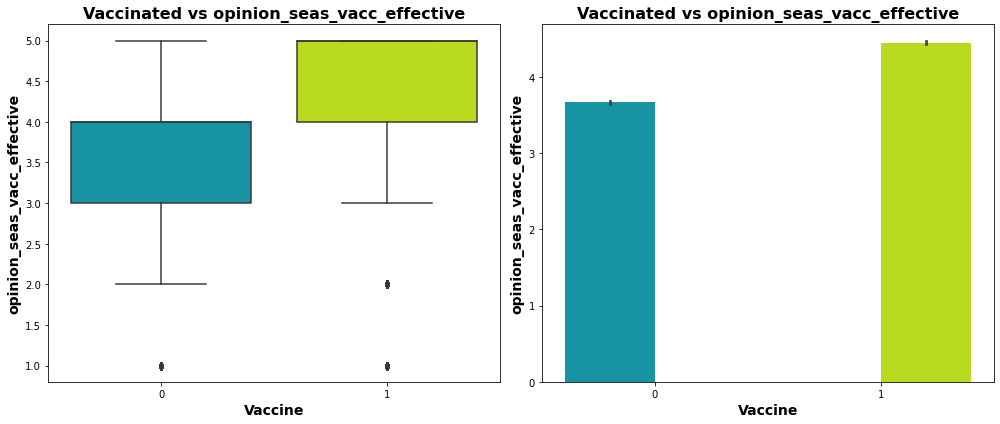

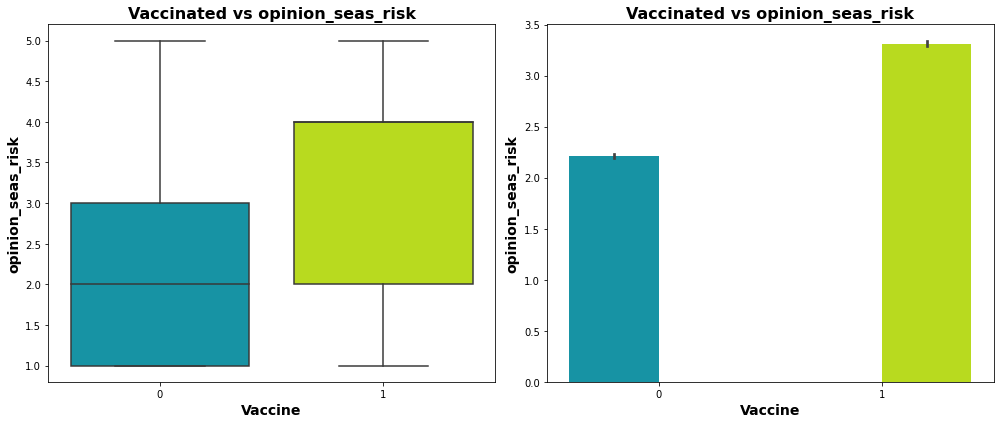

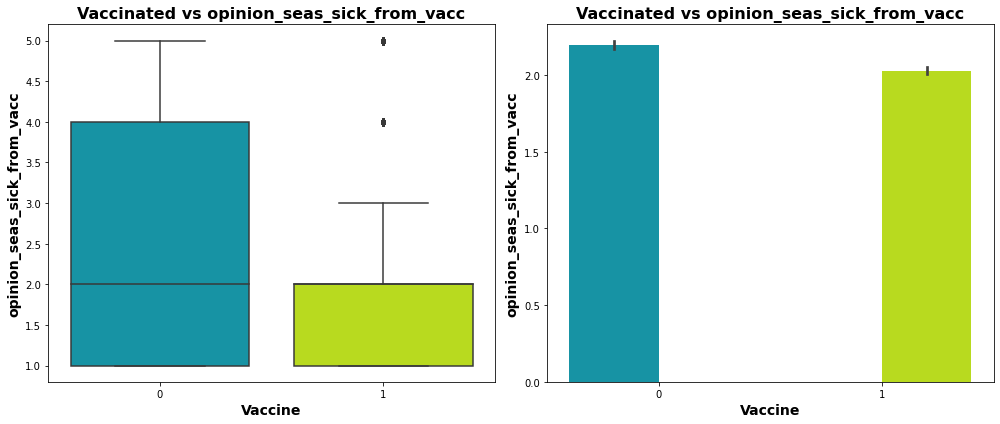

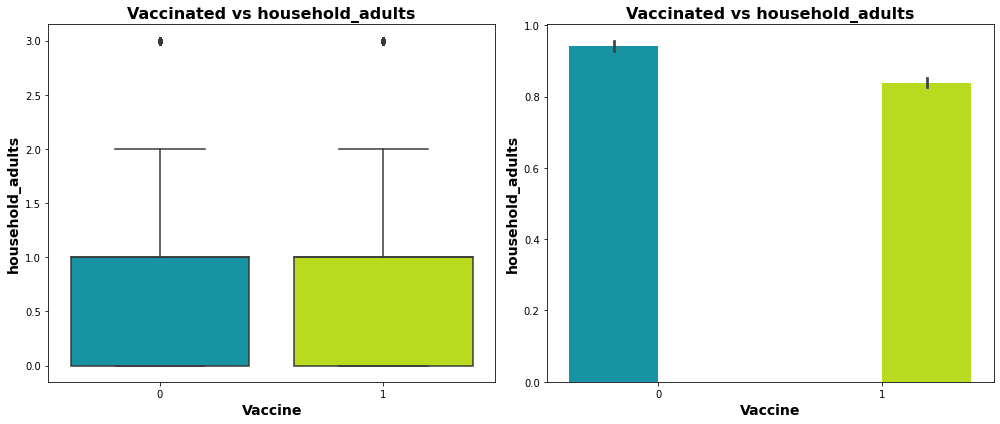

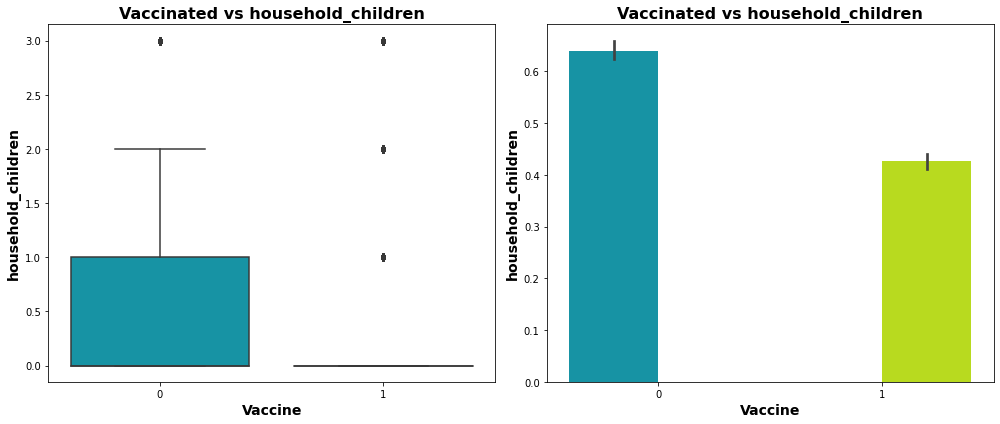

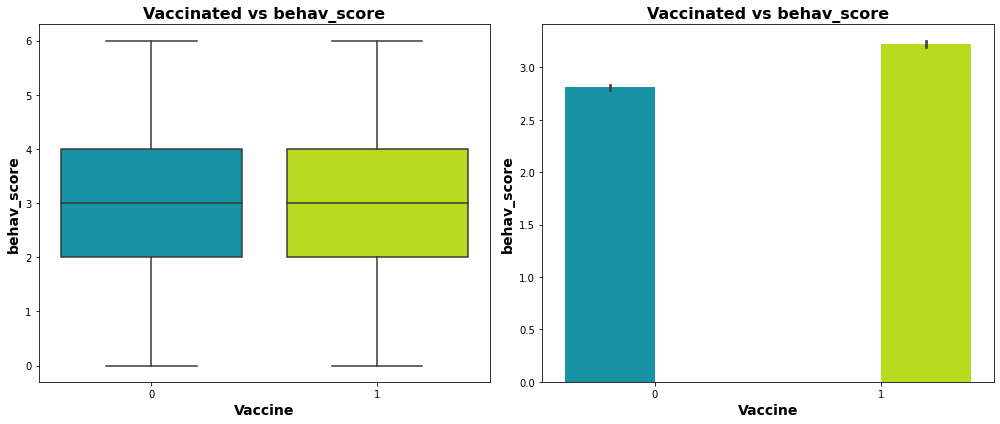

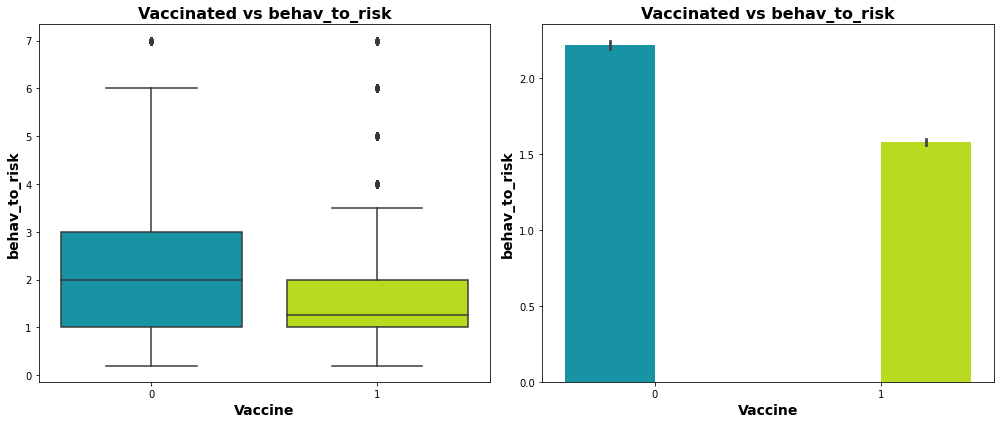

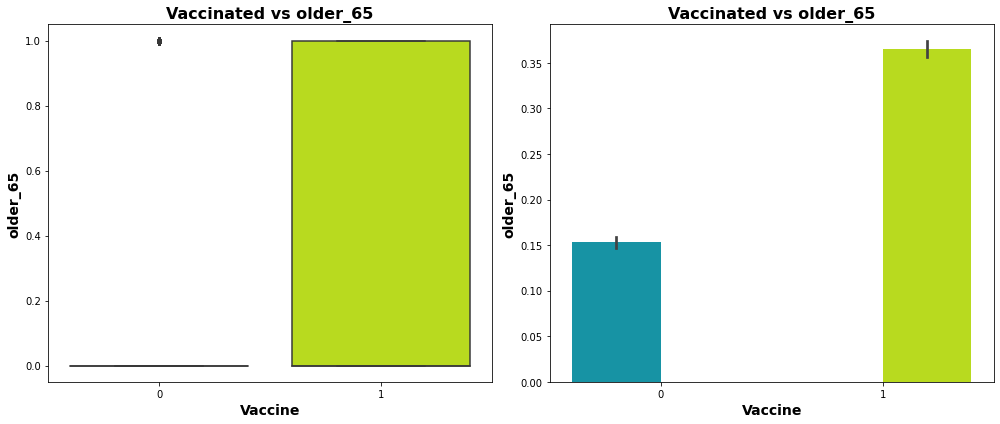

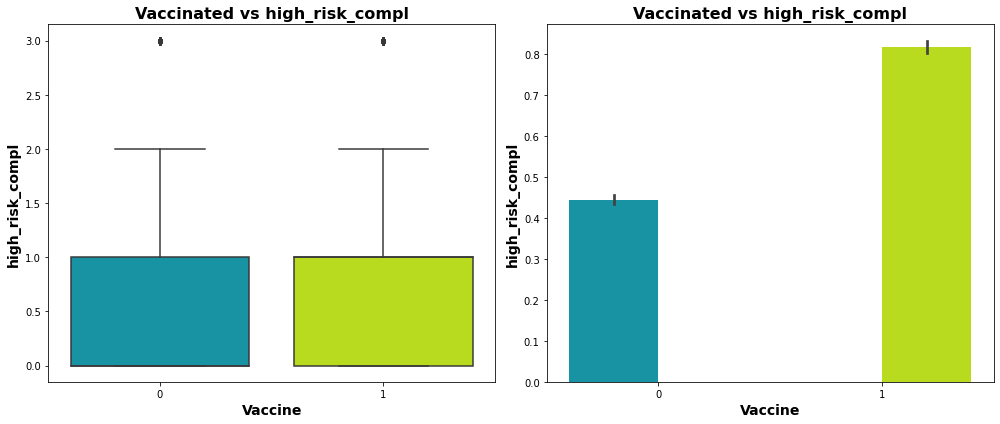

In [23]:
df_cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_bb(col, df)

> - There appears to be a reasonable amount of variation in most of the variables plotted above, and the majority of them seem to differ at least a little between those who got the vaccine and those who did not. Thus, these variables will all be included as predictors in initial models.

## Investigate Potential Interaction Effects

> - No substantial interaction effects were found, so these features do not need to be engineered.

/Users/maxsteele/FlatIron-DS-CourseMaterials/Mod3/Mod3_Project/recloned/dsc-mod-3-project-v2-1-onl01-dtsc-ft-070620/project_functions.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,5))


<Figure size 504x360 with 0 Axes>

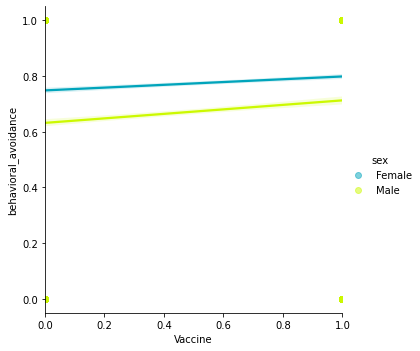

<Figure size 504x360 with 0 Axes>

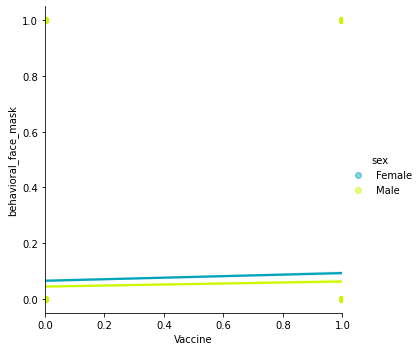

<Figure size 504x360 with 0 Axes>

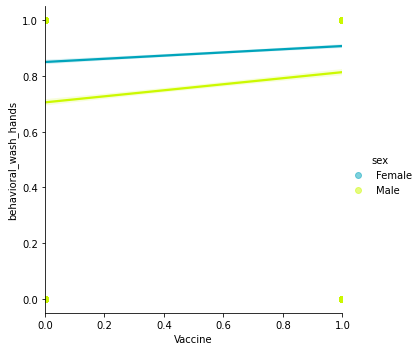

<Figure size 504x360 with 0 Axes>

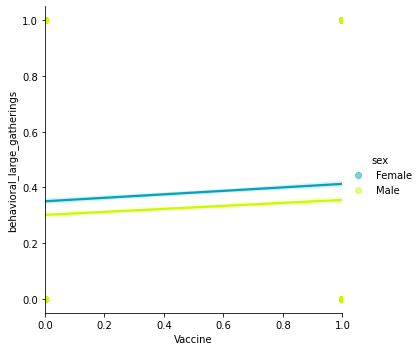

<Figure size 504x360 with 0 Axes>

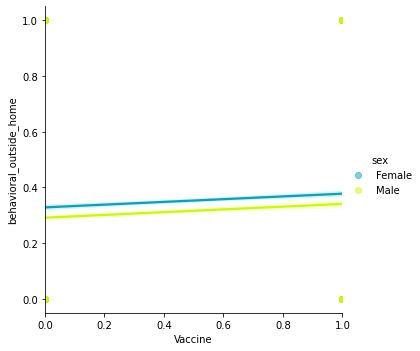

<Figure size 504x360 with 0 Axes>

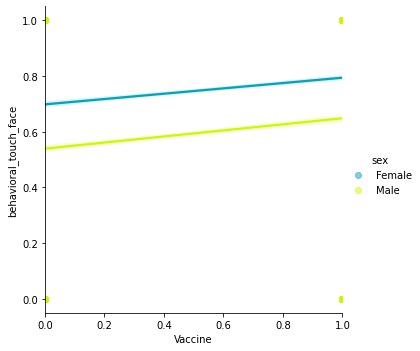

<Figure size 504x360 with 0 Axes>

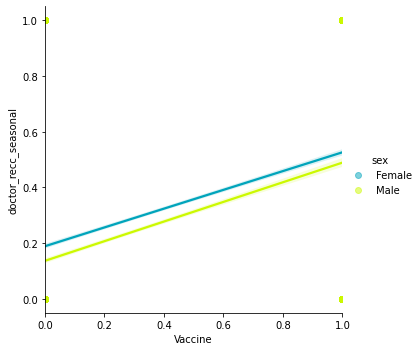

<Figure size 504x360 with 0 Axes>

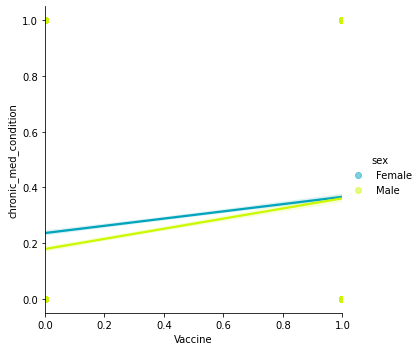

<Figure size 504x360 with 0 Axes>

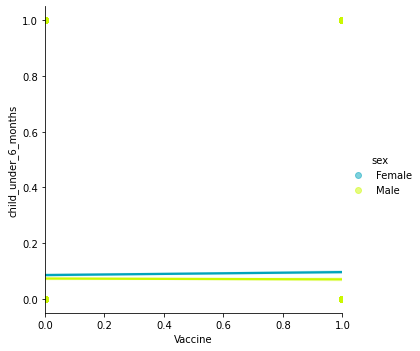

<Figure size 504x360 with 0 Axes>

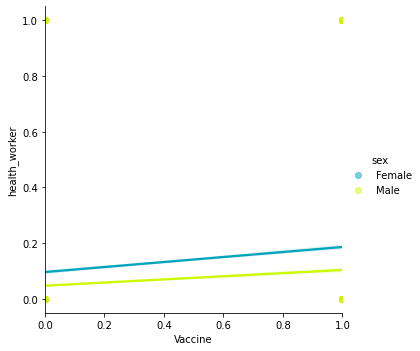

<Figure size 504x360 with 0 Axes>

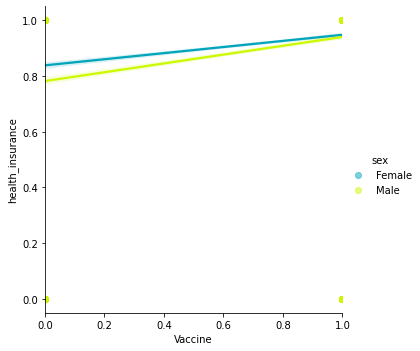

<Figure size 504x360 with 0 Axes>

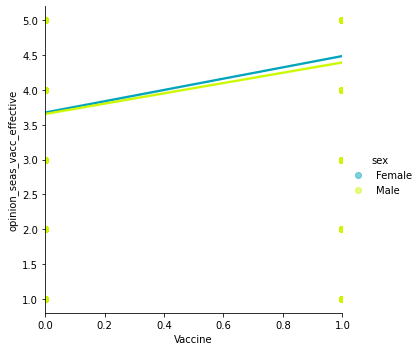

<Figure size 504x360 with 0 Axes>

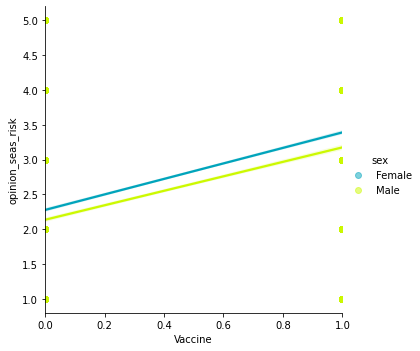

<Figure size 504x360 with 0 Axes>

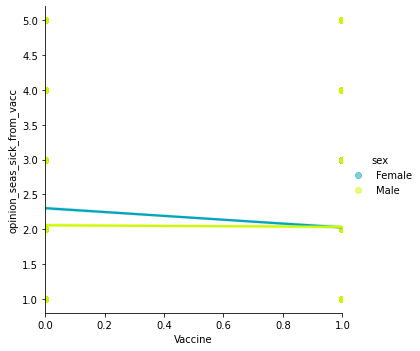

<Figure size 504x360 with 0 Axes>

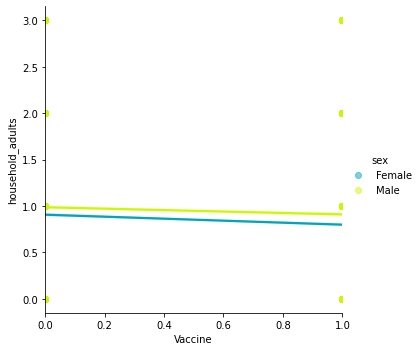

<Figure size 504x360 with 0 Axes>

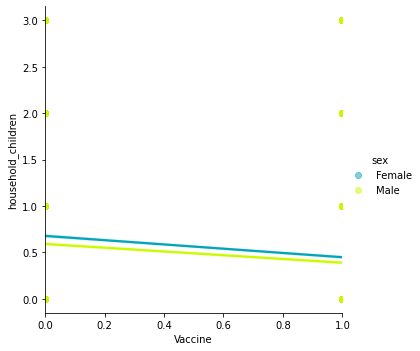

<Figure size 504x360 with 0 Axes>

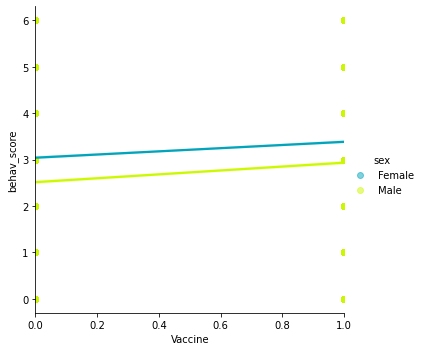

<Figure size 504x360 with 0 Axes>

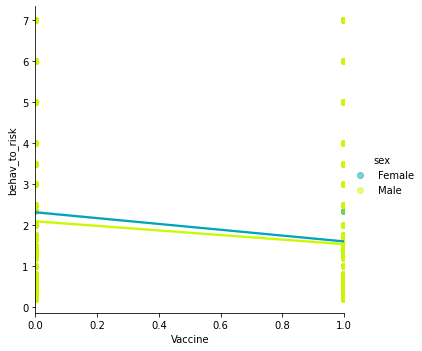

<Figure size 504x360 with 0 Axes>

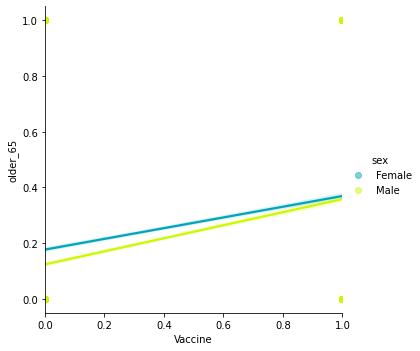

<Figure size 504x360 with 0 Axes>

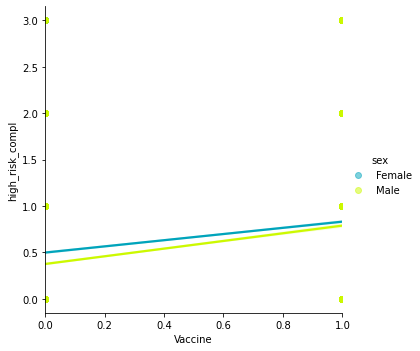

In [24]:
## check for interaction effects between sex and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='sex')

> - No obvious interactions between `sex` and other variables on whether someone gets the vaccine. The direction of the difference between males and females remains consistent across those not getting the vaccine and those that do get vaccinated.

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 504x360 with 0 Axes>

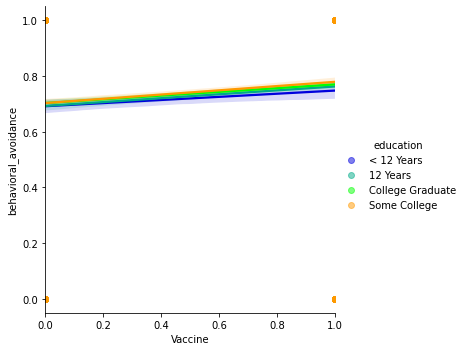

<Figure size 504x360 with 0 Axes>

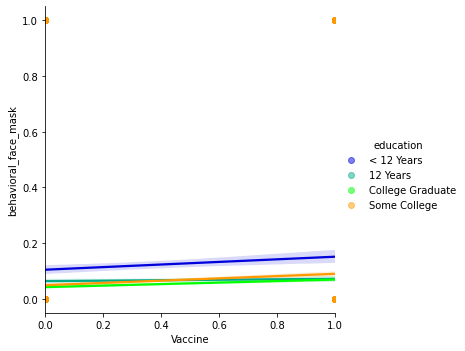

<Figure size 504x360 with 0 Axes>

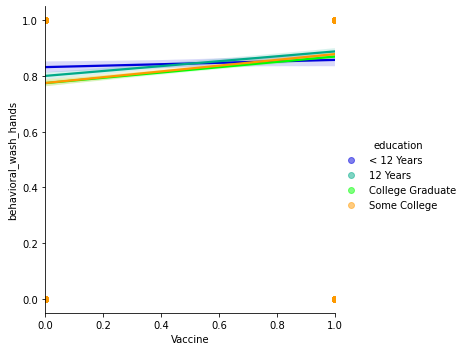

<Figure size 504x360 with 0 Axes>

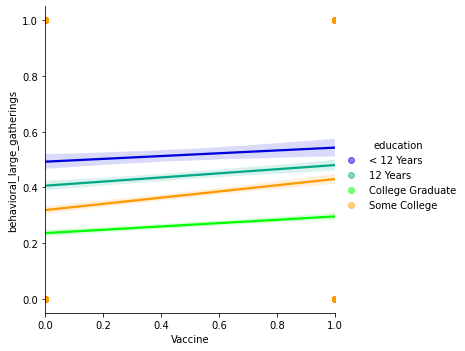

<Figure size 504x360 with 0 Axes>

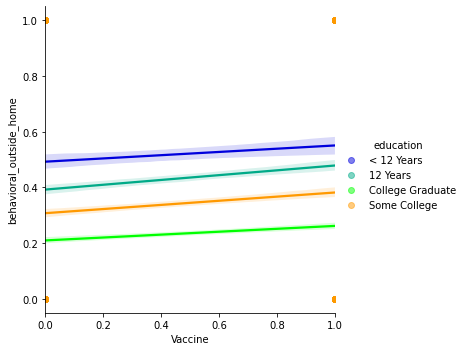

<Figure size 504x360 with 0 Axes>

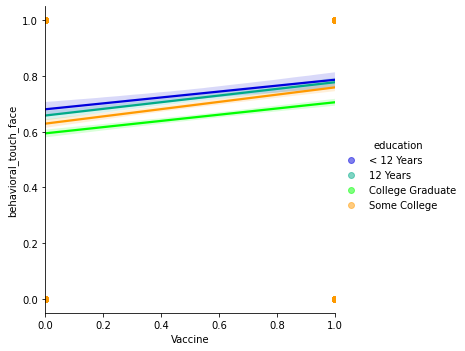

<Figure size 504x360 with 0 Axes>

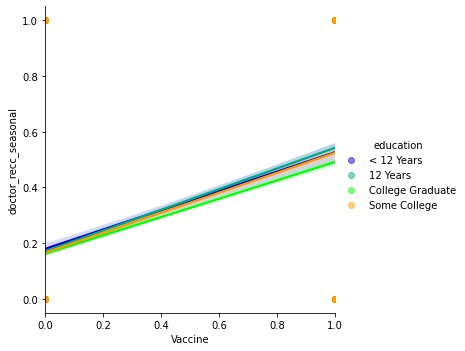

<Figure size 504x360 with 0 Axes>

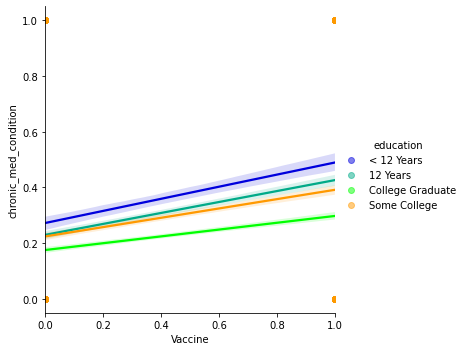

<Figure size 504x360 with 0 Axes>

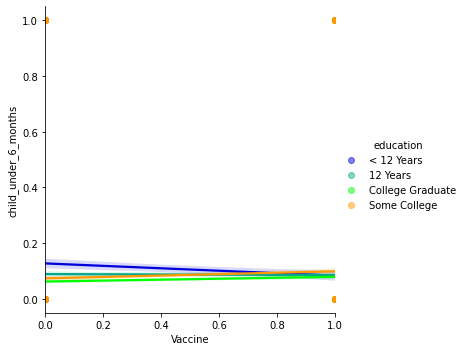

<Figure size 504x360 with 0 Axes>

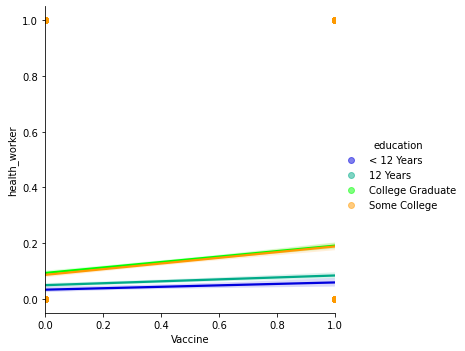

<Figure size 504x360 with 0 Axes>

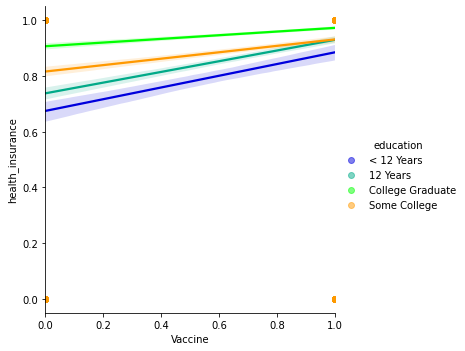

<Figure size 504x360 with 0 Axes>

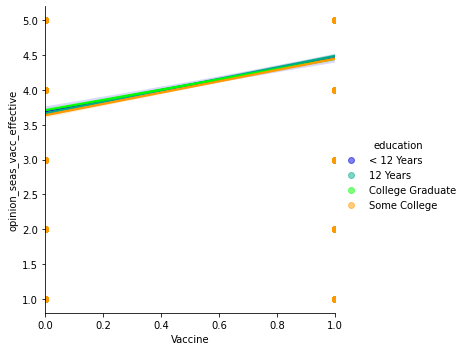

<Figure size 504x360 with 0 Axes>

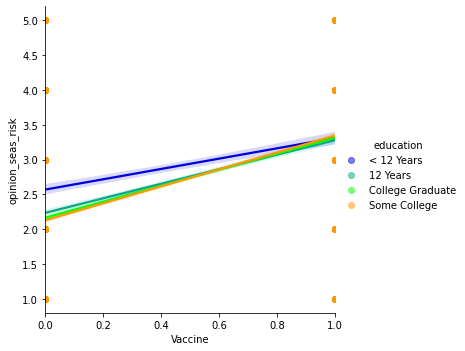

<Figure size 504x360 with 0 Axes>

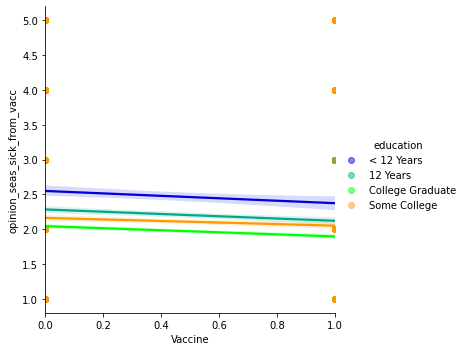

<Figure size 504x360 with 0 Axes>

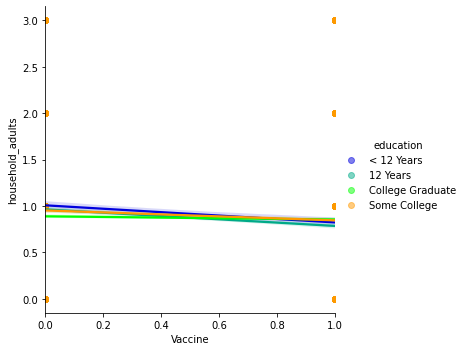

<Figure size 504x360 with 0 Axes>

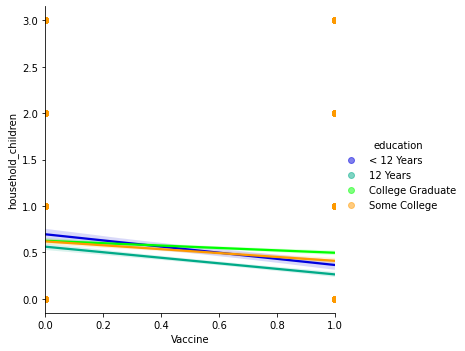

<Figure size 504x360 with 0 Axes>

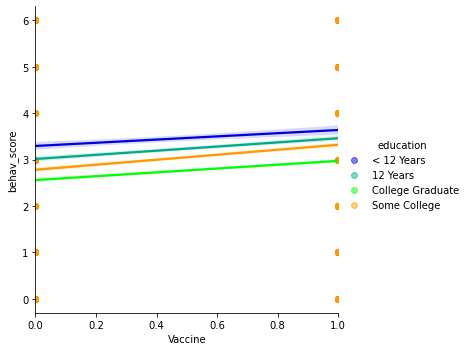

<Figure size 504x360 with 0 Axes>

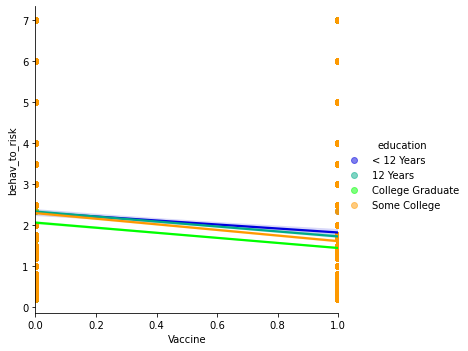

<Figure size 504x360 with 0 Axes>

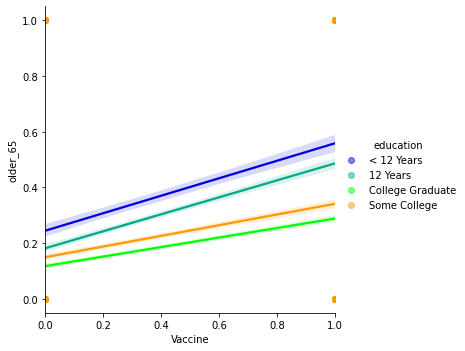

<Figure size 504x360 with 0 Axes>

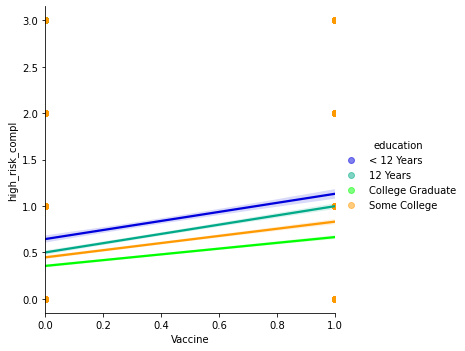

In [44]:
## check for interaction effects between education and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='education')

> - While some of the lines for different levels of education do cross going from not vaccinated to vaccinated, there are no variables for which this interaction makes a substanial difference among education levels. If the lines do cross, they stay very close together and don't show much separation. As such no interaction features for education will be considered.

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 504x360 with 0 Axes>

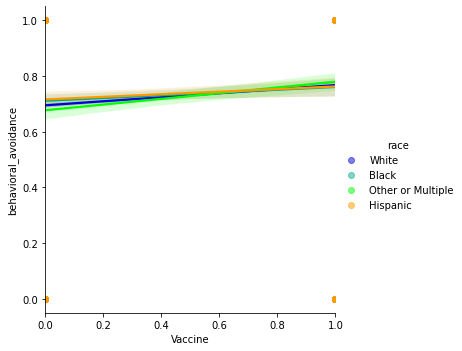

<Figure size 504x360 with 0 Axes>

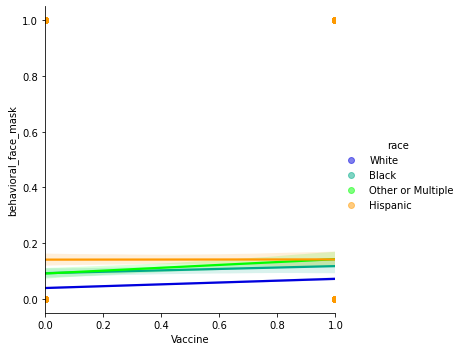

<Figure size 504x360 with 0 Axes>

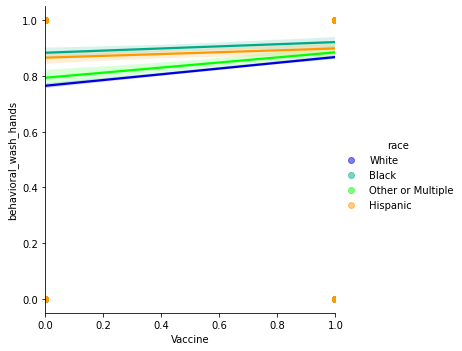

<Figure size 504x360 with 0 Axes>

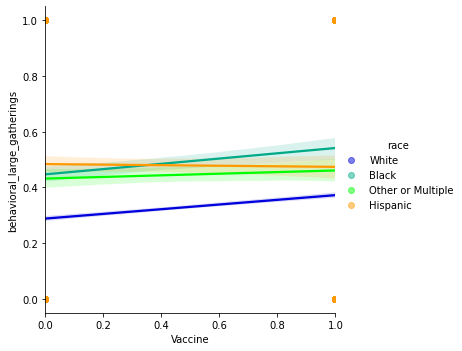

<Figure size 504x360 with 0 Axes>

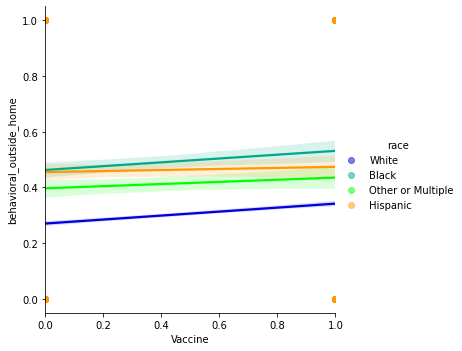

<Figure size 504x360 with 0 Axes>

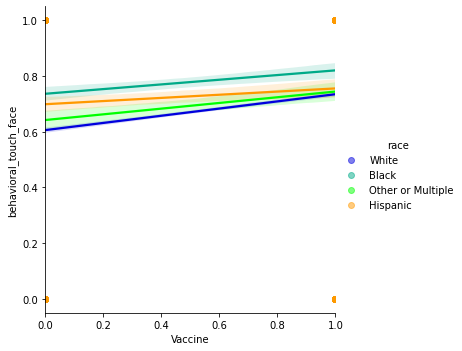

<Figure size 504x360 with 0 Axes>

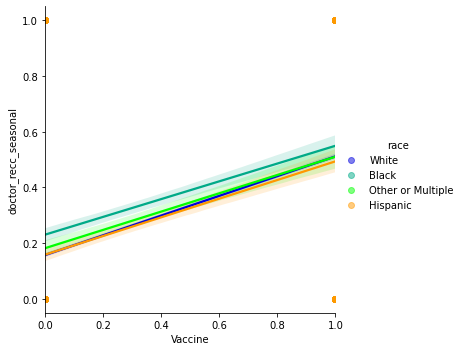

<Figure size 504x360 with 0 Axes>

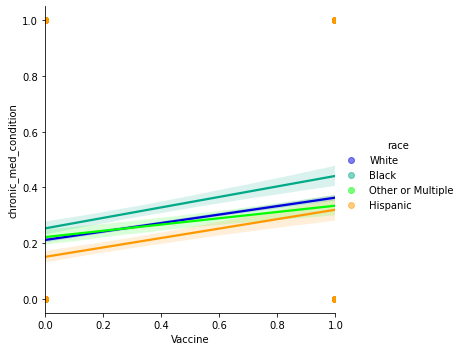

<Figure size 504x360 with 0 Axes>

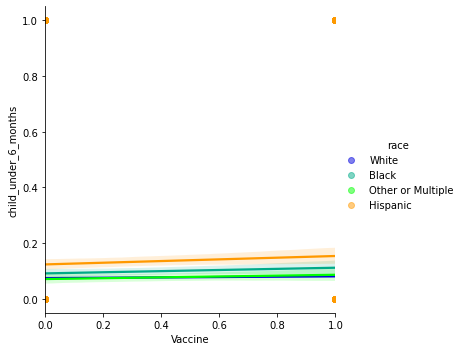

<Figure size 504x360 with 0 Axes>

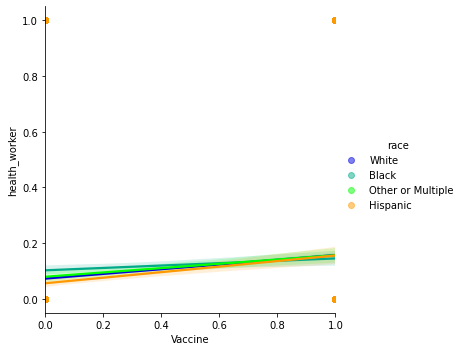

<Figure size 504x360 with 0 Axes>

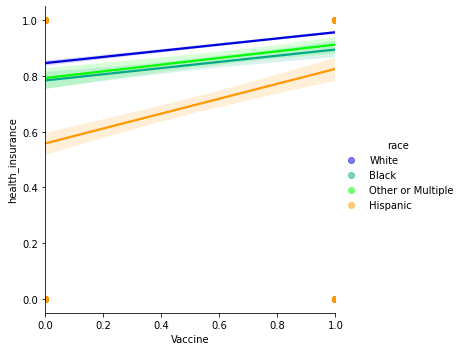

<Figure size 504x360 with 0 Axes>

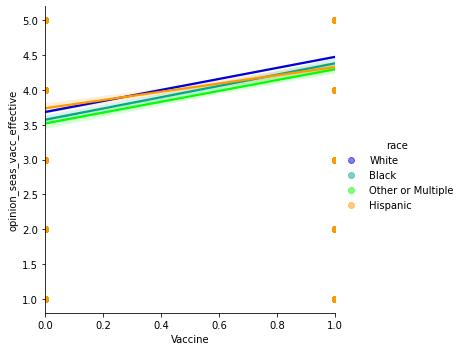

<Figure size 504x360 with 0 Axes>

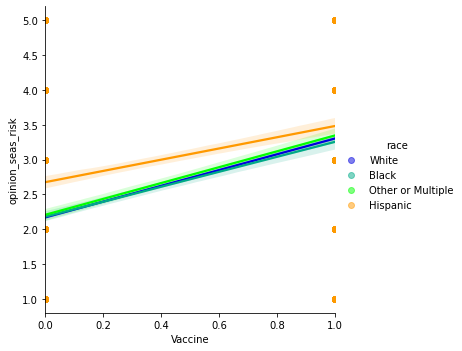

<Figure size 504x360 with 0 Axes>

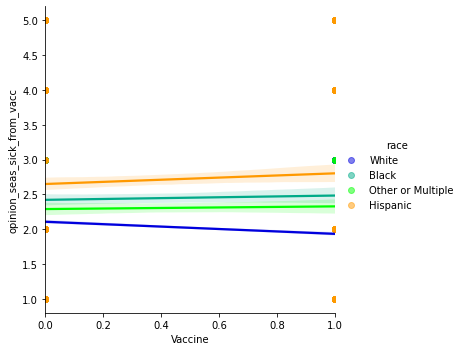

<Figure size 504x360 with 0 Axes>

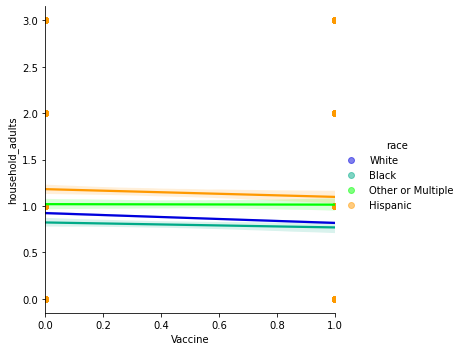

<Figure size 504x360 with 0 Axes>

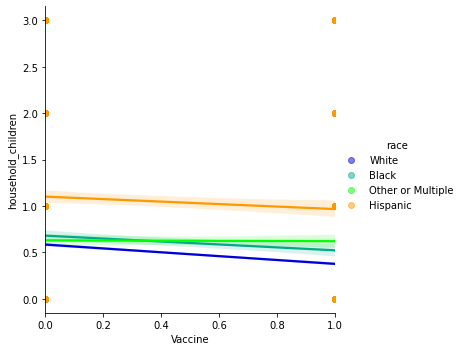

<Figure size 504x360 with 0 Axes>

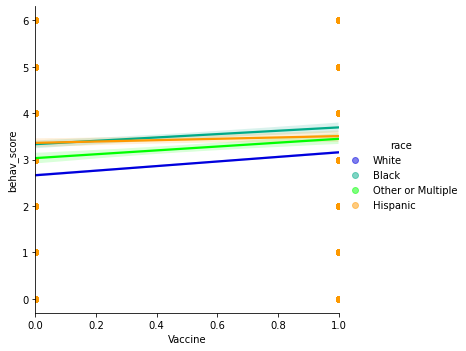

<Figure size 504x360 with 0 Axes>

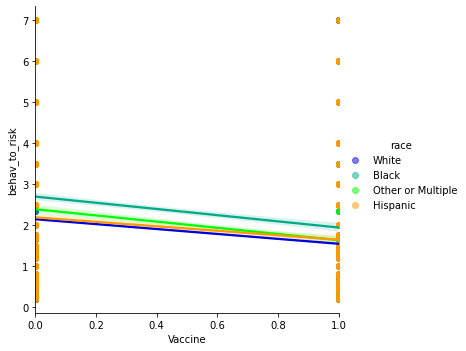

<Figure size 504x360 with 0 Axes>

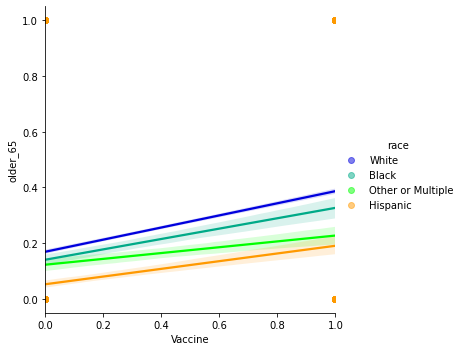

<Figure size 504x360 with 0 Axes>

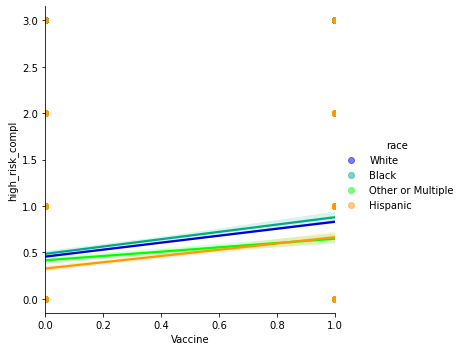

In [45]:
## check for interaction effects between education and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='race')

> - While some of the lines for different levels of education do cross going from not vaccinated to vaccinated, there are no variables for which this interaction makes a substanial difference among education levels. If the lines do cross, they stay very close together and don't show much separation. As such no interaction features for education will be considered.

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 504x360 with 0 Axes>

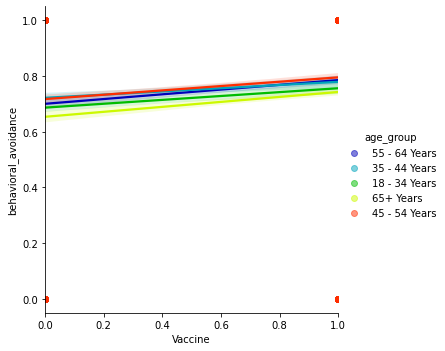

<Figure size 504x360 with 0 Axes>

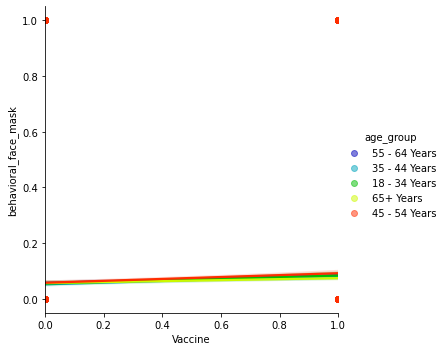

<Figure size 504x360 with 0 Axes>

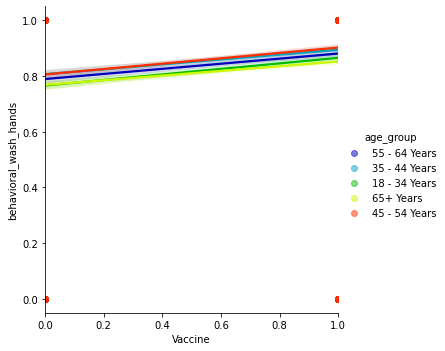

<Figure size 504x360 with 0 Axes>

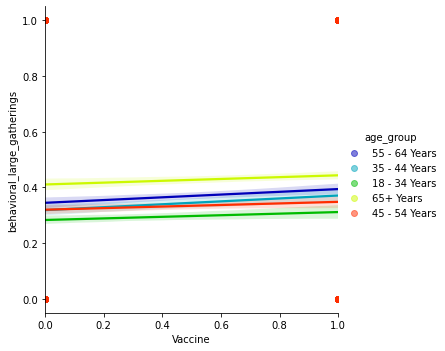

<Figure size 504x360 with 0 Axes>

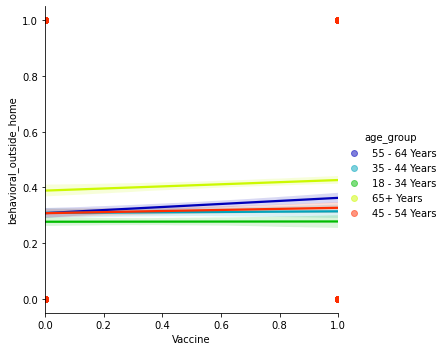

<Figure size 504x360 with 0 Axes>

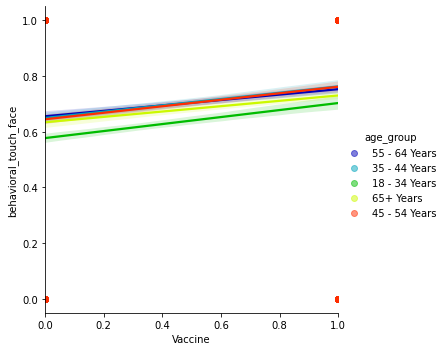

<Figure size 504x360 with 0 Axes>

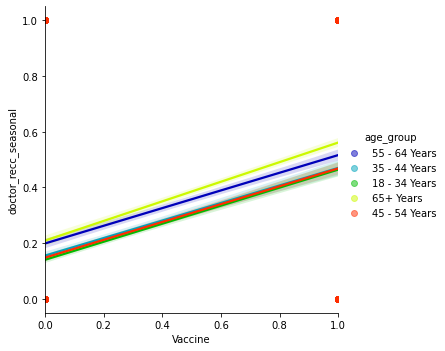

<Figure size 504x360 with 0 Axes>

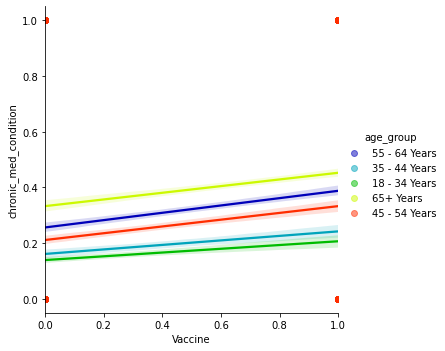

<Figure size 504x360 with 0 Axes>

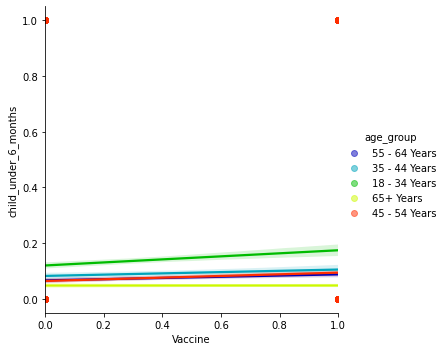

<Figure size 504x360 with 0 Axes>

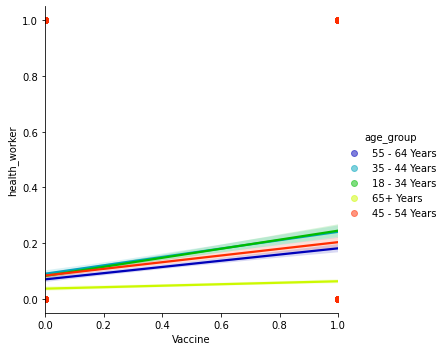

<Figure size 504x360 with 0 Axes>

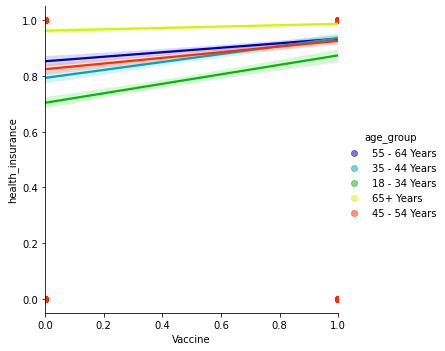

<Figure size 504x360 with 0 Axes>

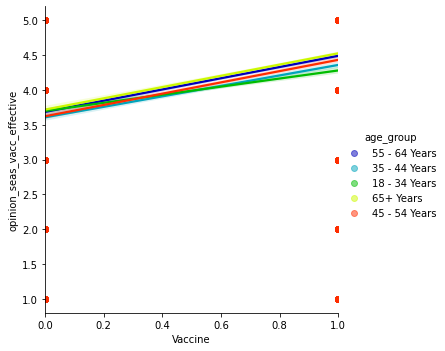

<Figure size 504x360 with 0 Axes>

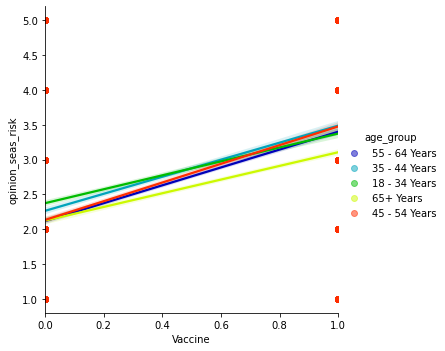

<Figure size 504x360 with 0 Axes>

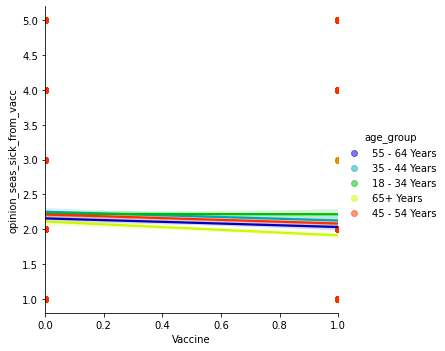

<Figure size 504x360 with 0 Axes>

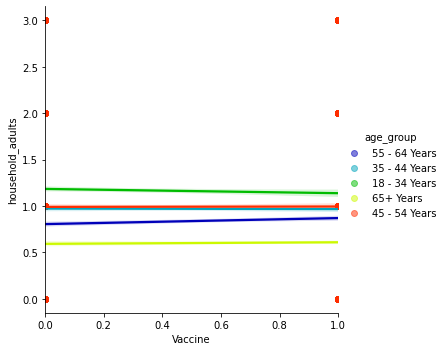

<Figure size 504x360 with 0 Axes>

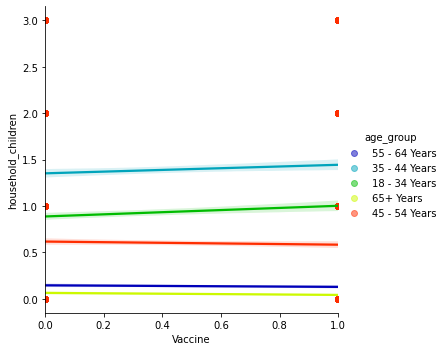

<Figure size 504x360 with 0 Axes>

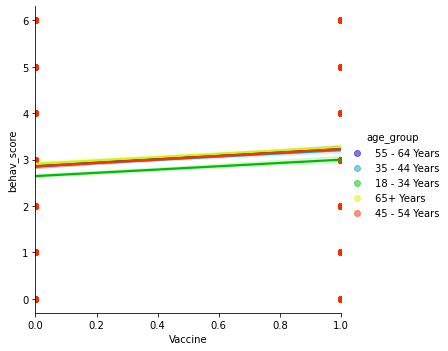

<Figure size 504x360 with 0 Axes>

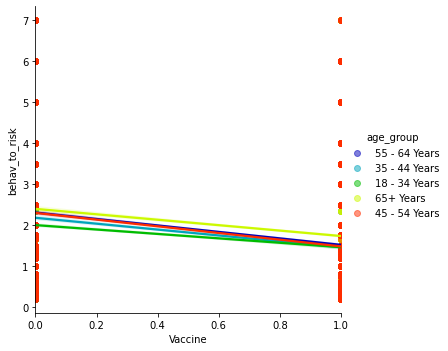

<Figure size 504x360 with 0 Axes>

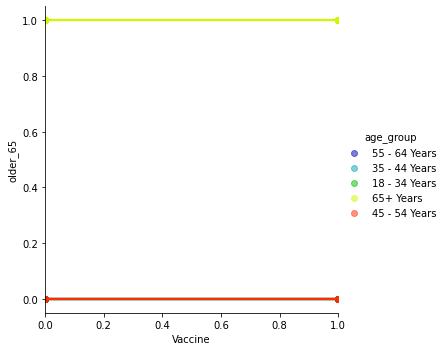

<Figure size 504x360 with 0 Axes>

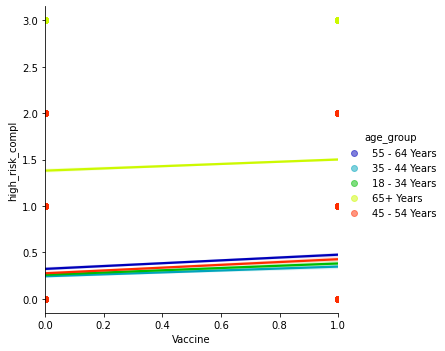

In [46]:
## check for interaction effects between education and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='age_group')

> - No obvious interactions between `age_group` and other variables on whether someone gets the vaccine. The direction of the difference among groups remains consistent across those not getting the vaccine and those that do get vaccinated.

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 504x360 with 0 Axes>

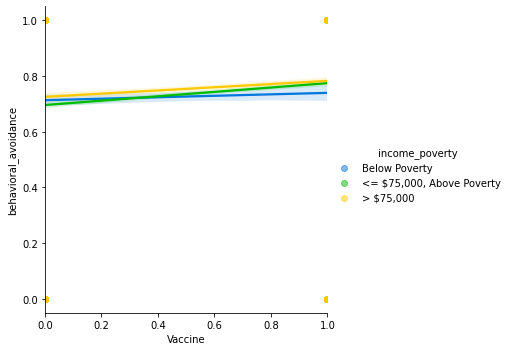

<Figure size 504x360 with 0 Axes>

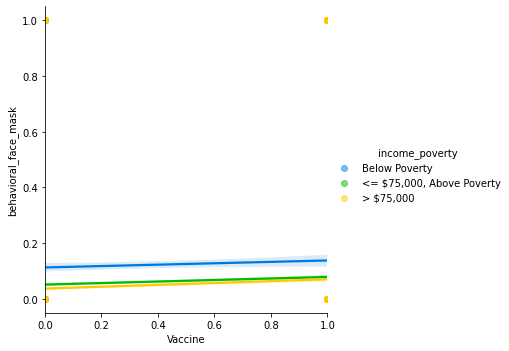

<Figure size 504x360 with 0 Axes>

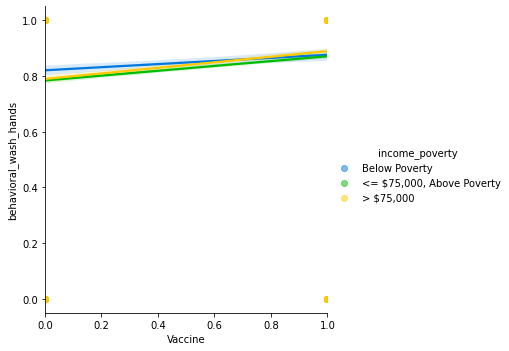

<Figure size 504x360 with 0 Axes>

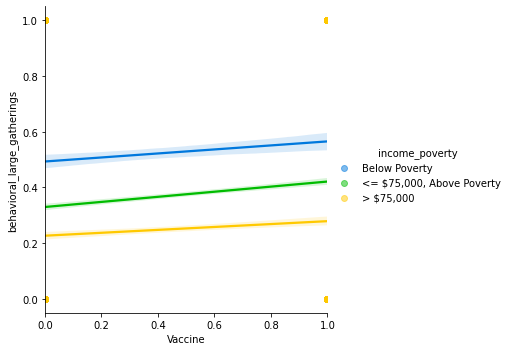

<Figure size 504x360 with 0 Axes>

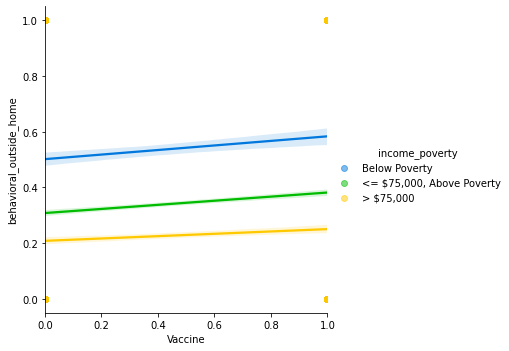

<Figure size 504x360 with 0 Axes>

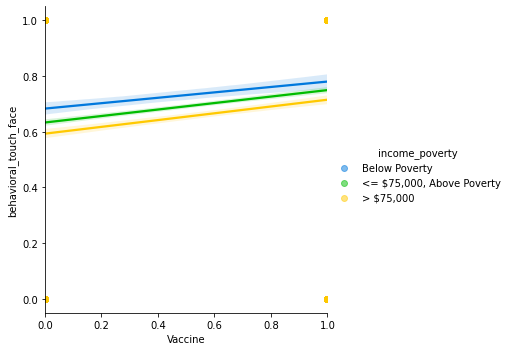

<Figure size 504x360 with 0 Axes>

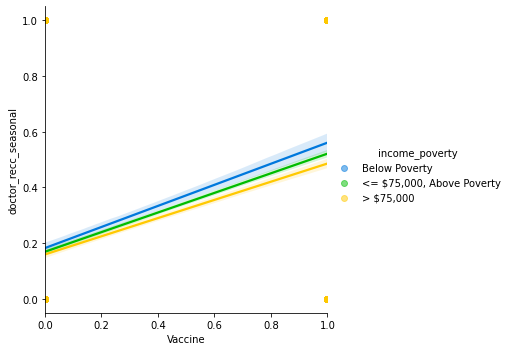

<Figure size 504x360 with 0 Axes>

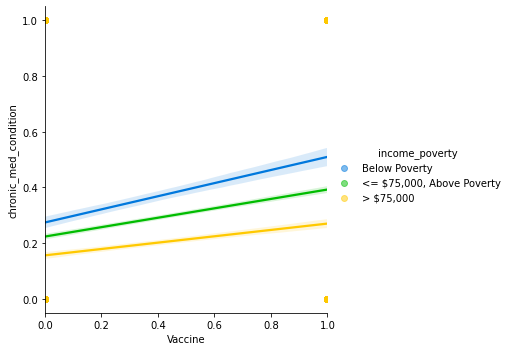

<Figure size 504x360 with 0 Axes>

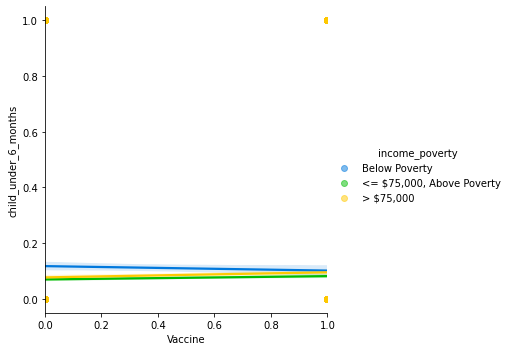

<Figure size 504x360 with 0 Axes>

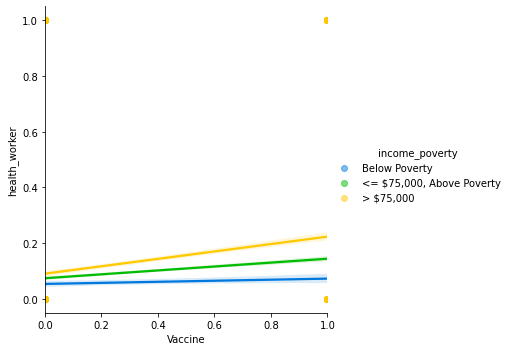

<Figure size 504x360 with 0 Axes>

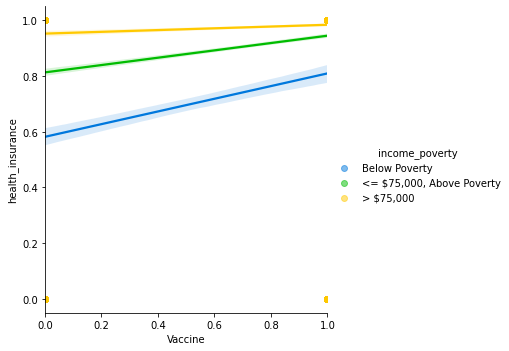

<Figure size 504x360 with 0 Axes>

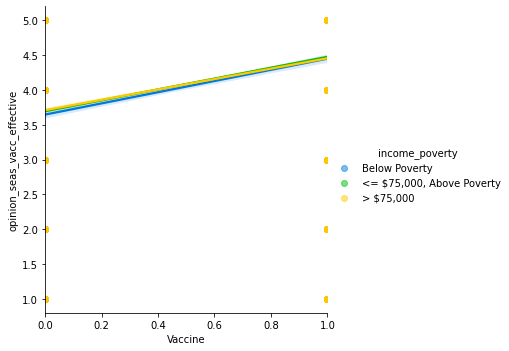

<Figure size 504x360 with 0 Axes>

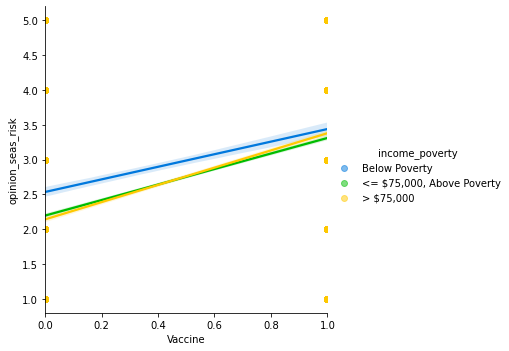

<Figure size 504x360 with 0 Axes>

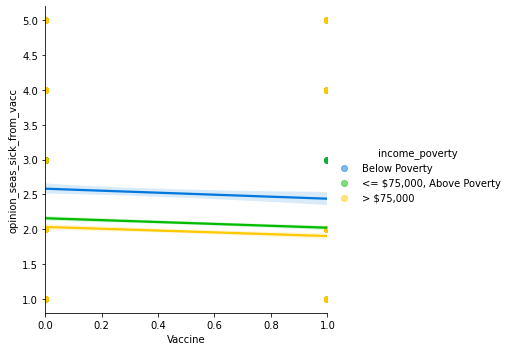

<Figure size 504x360 with 0 Axes>

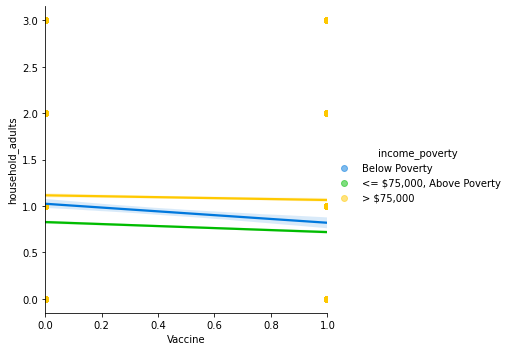

<Figure size 504x360 with 0 Axes>

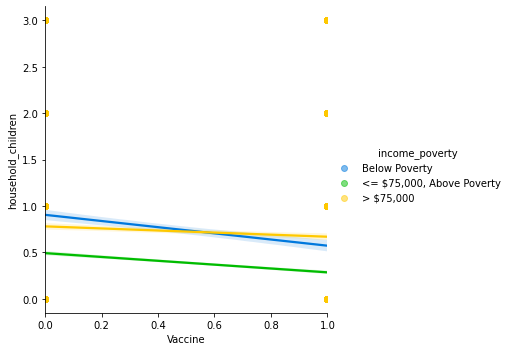

<Figure size 504x360 with 0 Axes>

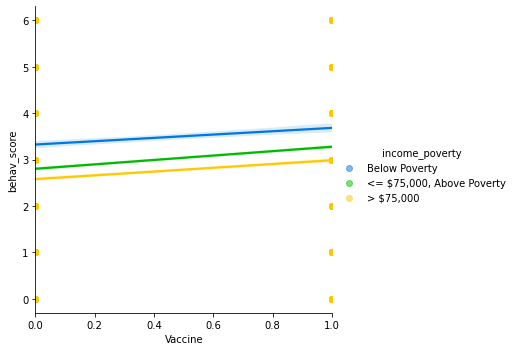

<Figure size 504x360 with 0 Axes>

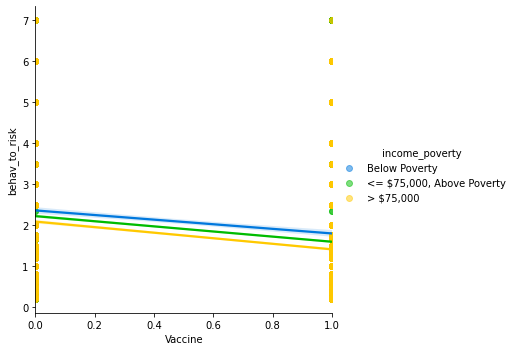

<Figure size 504x360 with 0 Axes>

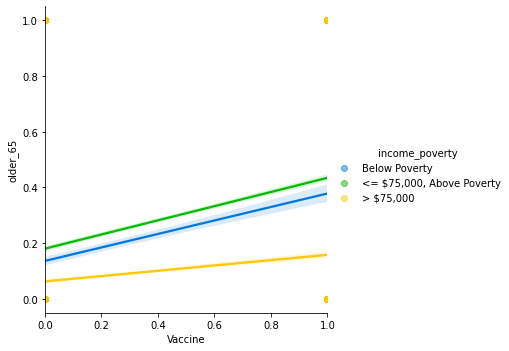

<Figure size 504x360 with 0 Axes>

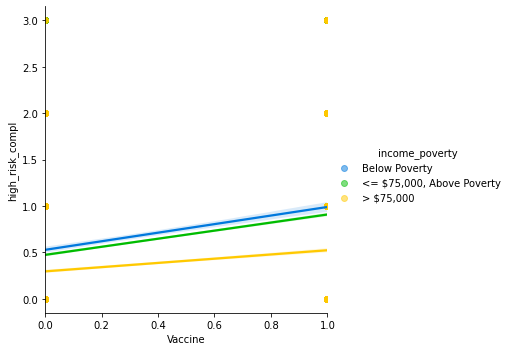

In [47]:
## check for interaction effects between education and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='income_poverty')

> - No obvious interactions between `income_poverty` and other variables on whether someone gets the vaccine. The direction of the difference among groups remains consistent across those not getting the vaccine and those that do get vaccinated.

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 504x360 with 0 Axes>

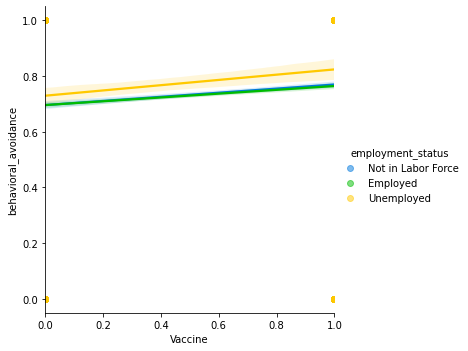

<Figure size 504x360 with 0 Axes>

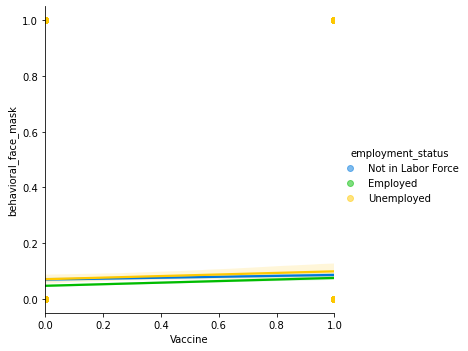

<Figure size 504x360 with 0 Axes>

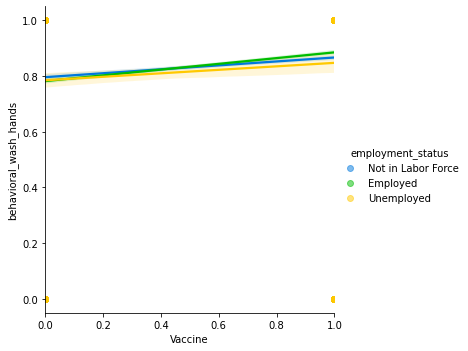

<Figure size 504x360 with 0 Axes>

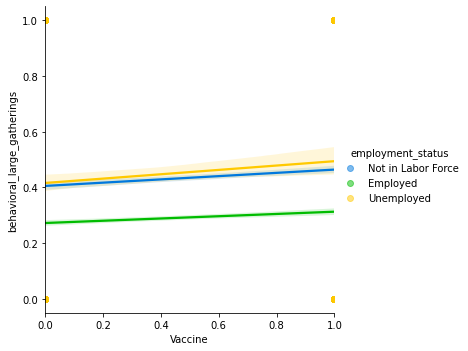

<Figure size 504x360 with 0 Axes>

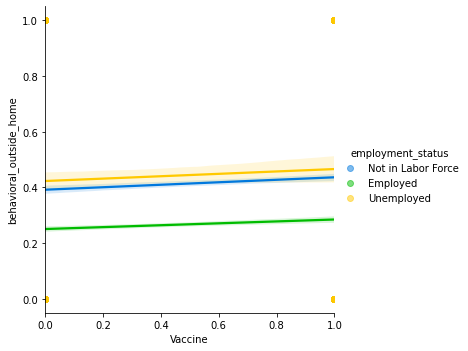

<Figure size 504x360 with 0 Axes>

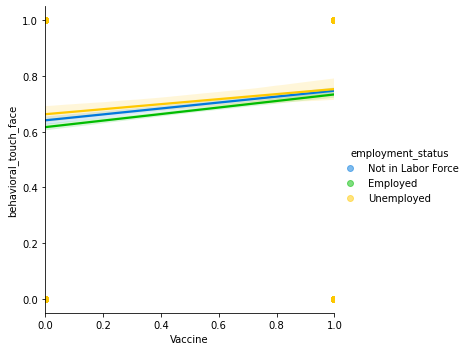

<Figure size 504x360 with 0 Axes>

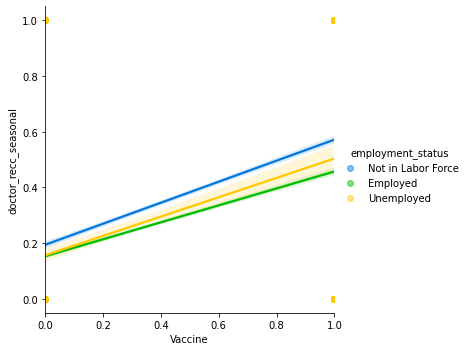

<Figure size 504x360 with 0 Axes>

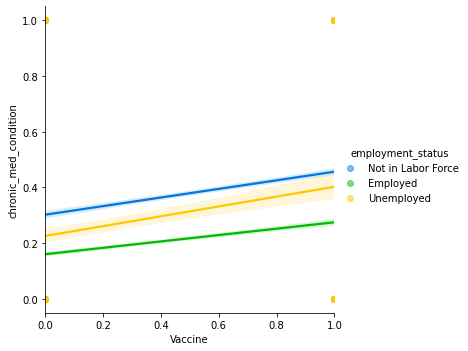

<Figure size 504x360 with 0 Axes>

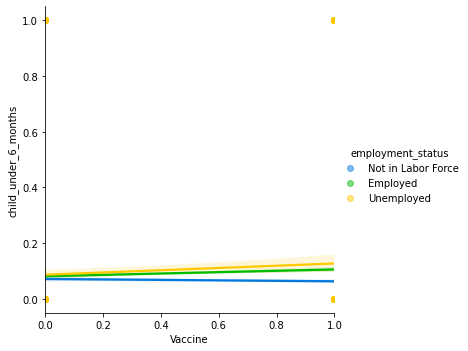

<Figure size 504x360 with 0 Axes>

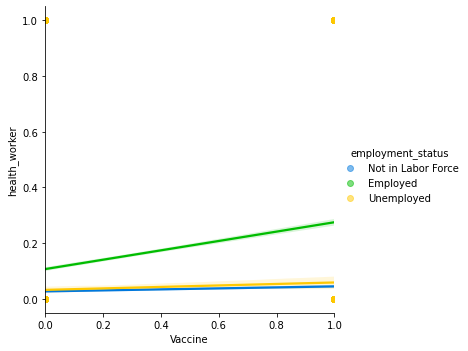

<Figure size 504x360 with 0 Axes>

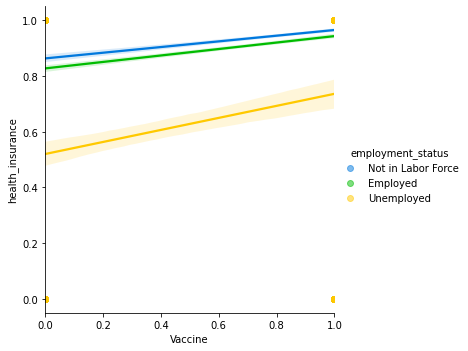

<Figure size 504x360 with 0 Axes>

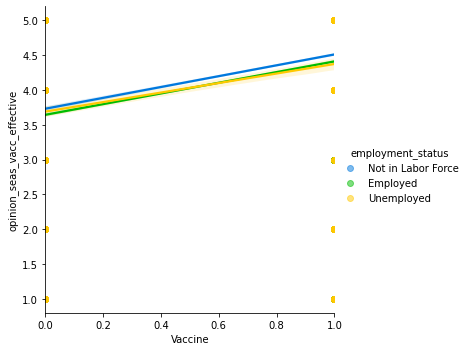

<Figure size 504x360 with 0 Axes>

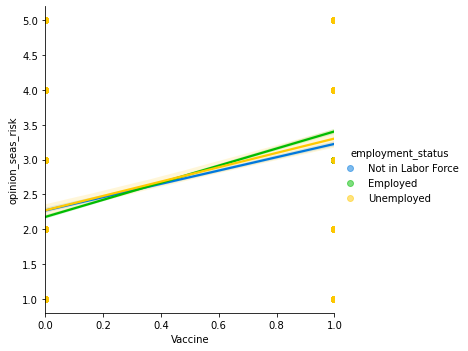

<Figure size 504x360 with 0 Axes>

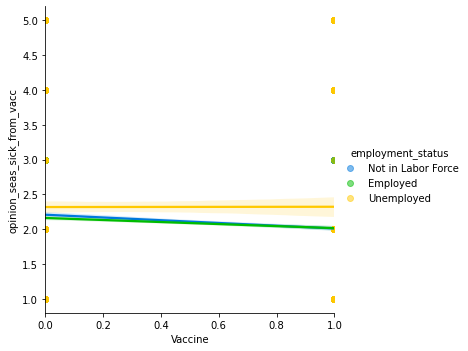

<Figure size 504x360 with 0 Axes>

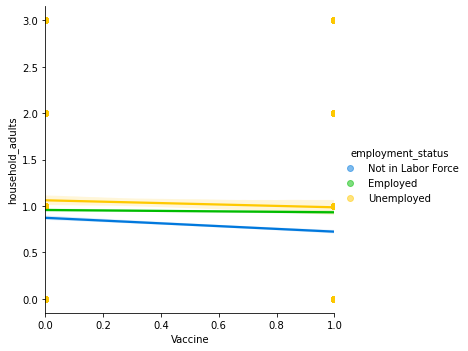

<Figure size 504x360 with 0 Axes>

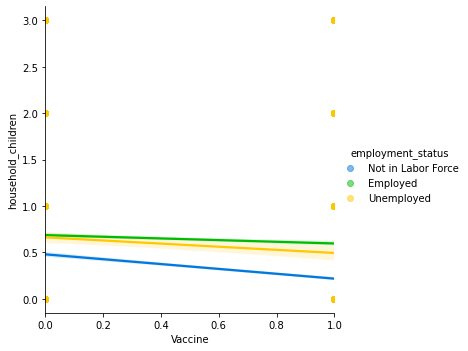

<Figure size 504x360 with 0 Axes>

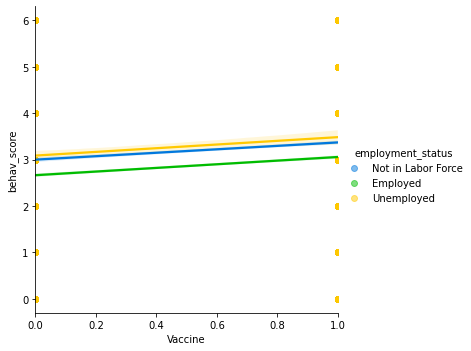

<Figure size 504x360 with 0 Axes>

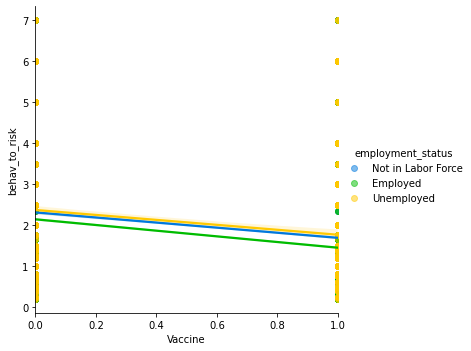

<Figure size 504x360 with 0 Axes>

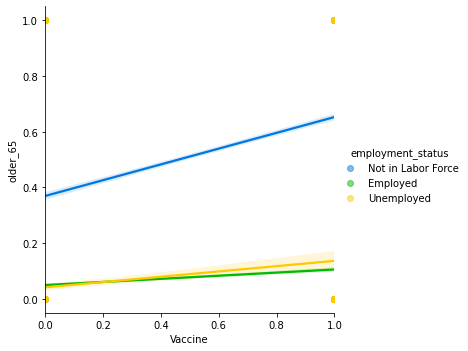

<Figure size 504x360 with 0 Axes>

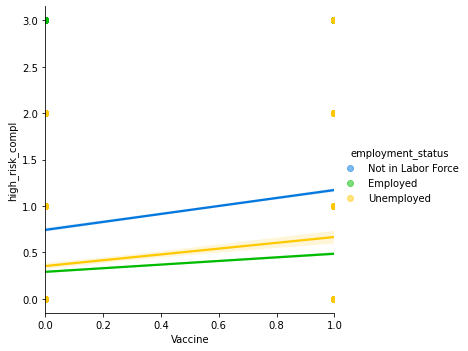

In [48]:
## check for interaction effects between education and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='employment_status')

> - No obvious interactions between `employment_status` and other variables on whether someone gets the vaccine. The direction of the difference among groups remains consistent across those not getting the vaccine and those that do get vaccinated.

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 504x360 with 0 Axes>

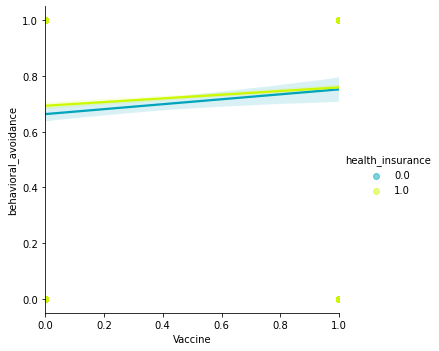

<Figure size 504x360 with 0 Axes>

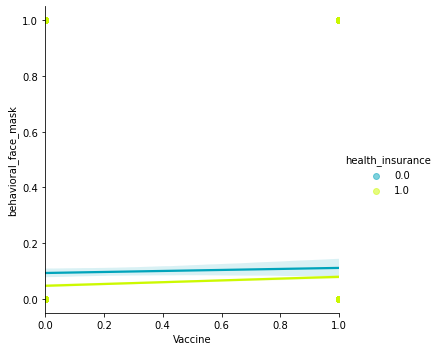

<Figure size 504x360 with 0 Axes>

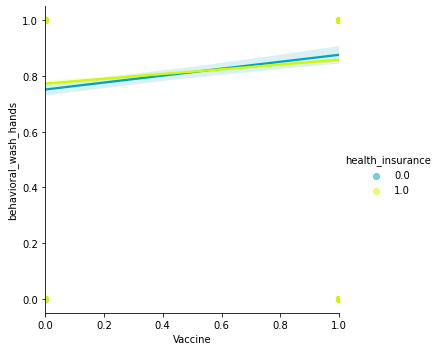

<Figure size 504x360 with 0 Axes>

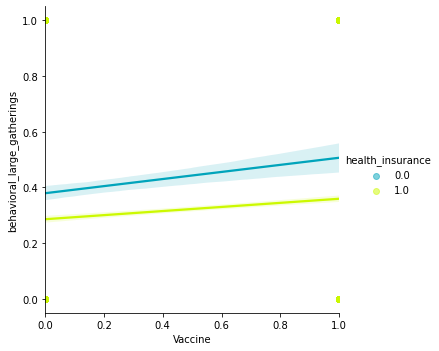

<Figure size 504x360 with 0 Axes>

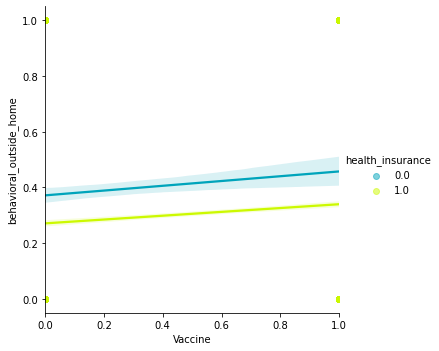

<Figure size 504x360 with 0 Axes>

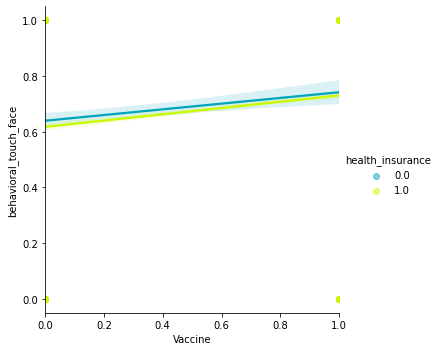

<Figure size 504x360 with 0 Axes>

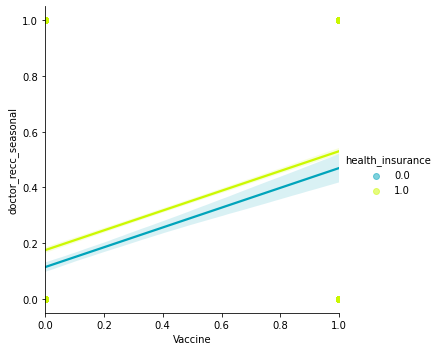

<Figure size 504x360 with 0 Axes>

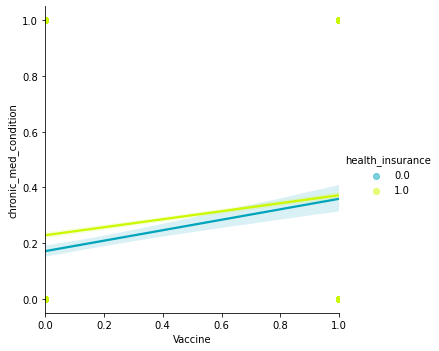

<Figure size 504x360 with 0 Axes>

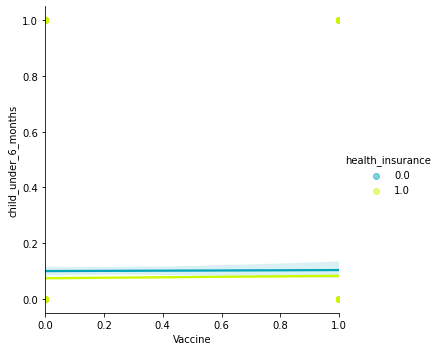

<Figure size 504x360 with 0 Axes>

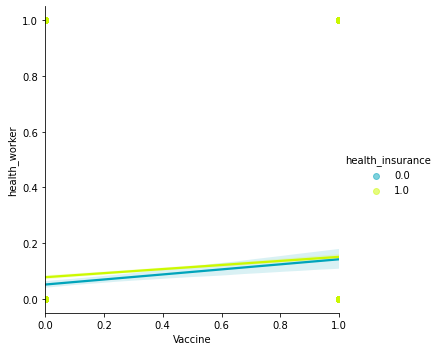

<Figure size 504x360 with 0 Axes>

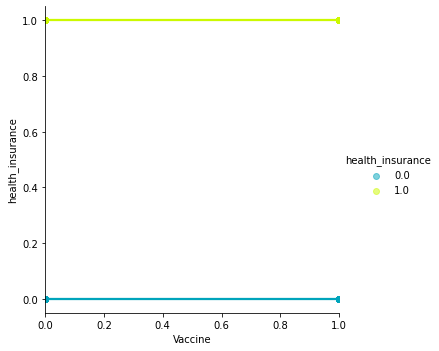

<Figure size 504x360 with 0 Axes>

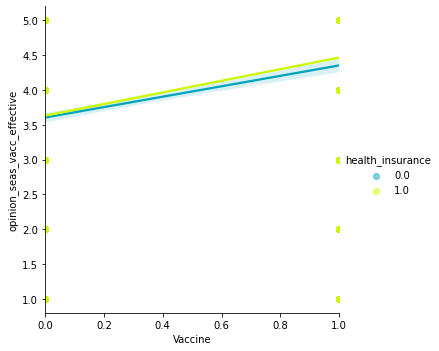

<Figure size 504x360 with 0 Axes>

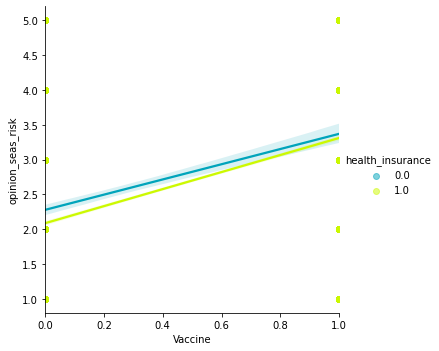

<Figure size 504x360 with 0 Axes>

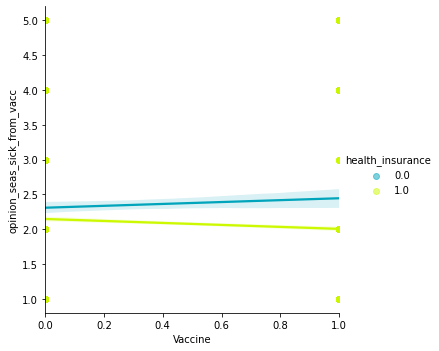

<Figure size 504x360 with 0 Axes>

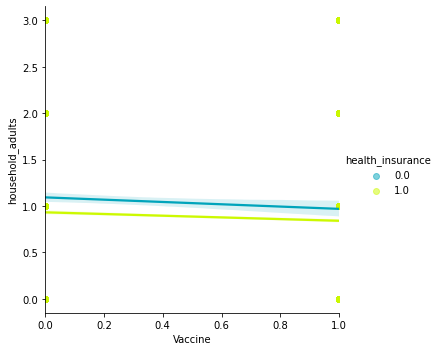

<Figure size 504x360 with 0 Axes>

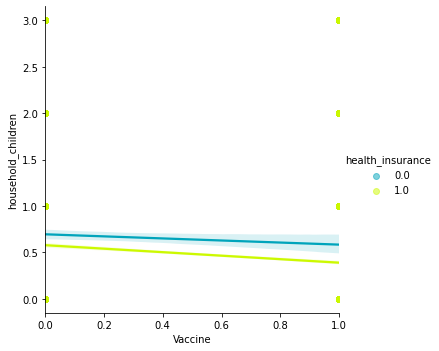

<Figure size 504x360 with 0 Axes>

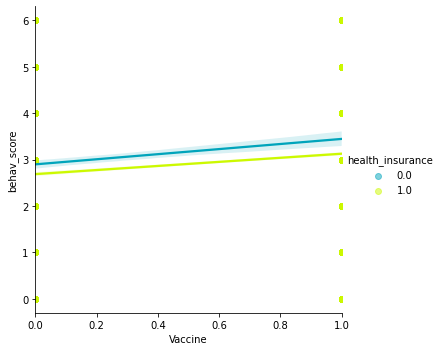

<Figure size 504x360 with 0 Axes>

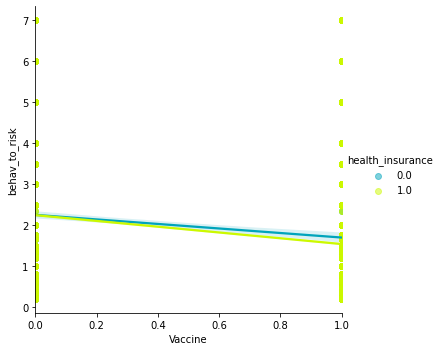

<Figure size 504x360 with 0 Axes>

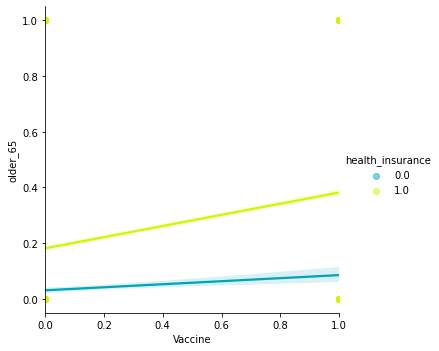

<Figure size 504x360 with 0 Axes>

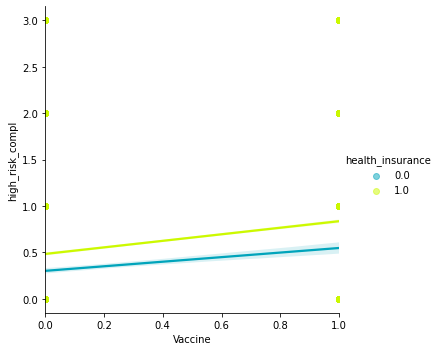

In [49]:
## check for interaction effects between education and other variables
for col in df.drop(columns=[*df_cat_cols, 'seasonal_vaccine'], axis=1).columns:
    plot_reg(col, df, category='health_insurance')

> - No obvious interactions between `health_insurance` and other variables on whether someone gets the vaccine. The direction of the difference among groups remains consistent across those not getting the vaccine and those that do get vaccinated.

## Investigate Correlation Among Variables

> - For simpler models like Logistic Regression, will likely want to avoid including highly correlated predictor variables to avoid issues with multicollinearity. I will use a threshold of 0.75 to exclude highly correlated sets of variables from these models. Intercorrelation among predictor variables should be much less of an issue for more complex models like Random Forest Classifiers. 
- As shown below, very few of the variables are highly correlated. The `behav_score` variable is unsurprisingly correlated with the behavioral metrics that went into calculating the score, but the correlations are all below 0.75. A similar trend exists for the `high_risk_compl` variable and the features that went into calculating that, but again, nothing exceeds the threshold to be excluded.

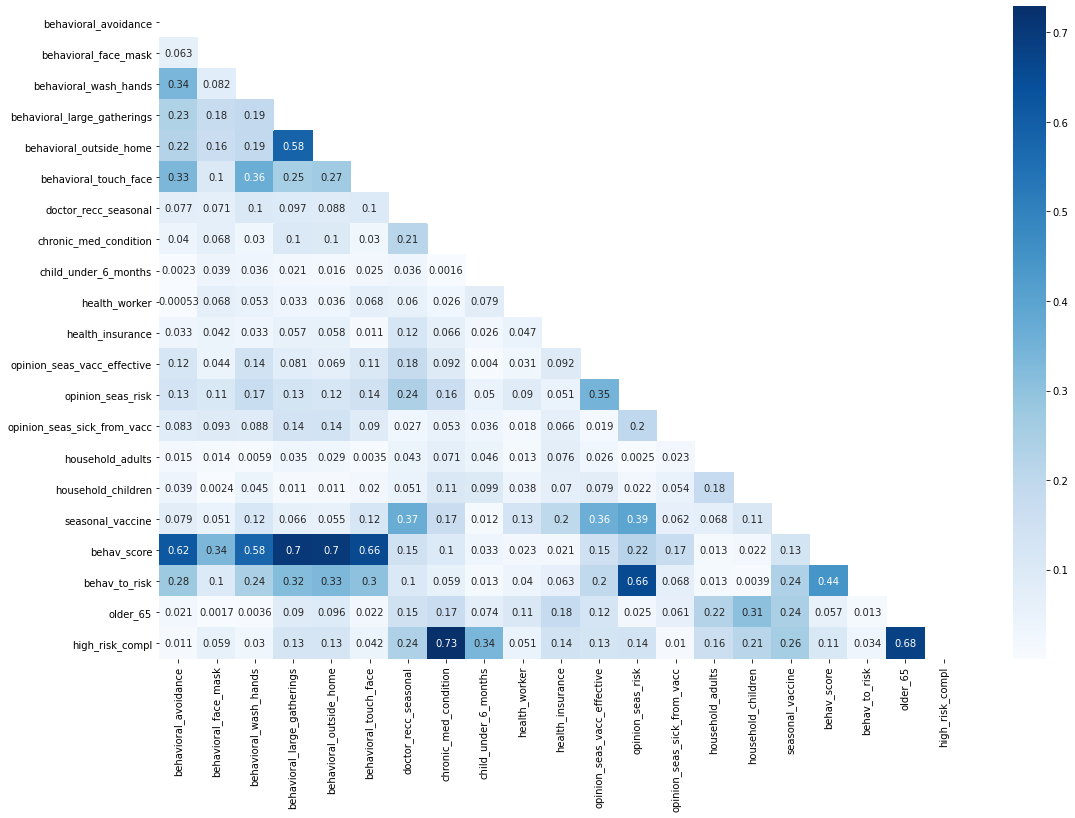

In [30]:
## plot correlations among variables as an annotated heatmap
corr = df.corr().abs()
mask = np.zeros_like(corr)
## mask the correlations of the variables with themselves along the diagonal and all duplicate
 ## correlations to the right of that line
mask[np.triu_indices_from(mask)] = True
mask
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask);

# MODEL

# INTERPRET

# Conclusions/Recommendations